In [1]:
from preprocessing_transmission_files import preprocess_transmission
from preprocessing_transmission_files import fix_zfill
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm
import os

/share/python-virtual-environments/mesmerize-v0.8-22/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
/share/python-virtual-environments/mesmerize-v0.8-22/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import pandas as pd

In [15]:
from IPython.display import display, HTML

# Get the data

Gather all the transmission files within the project.

In [31]:
# datapath = "/data/temp/jorgen/palp_proj_2019/trns/trns_for_panels/**/*.trn"
datapath = "/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/**/*.trn"

In [3]:
trns = glob.glob(datapath, recursive = True)
trns

['/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/press/by/palp_all_press_by.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/press/pc2/palp_all_press_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/by/nh4_1/palp_nh4_1mM_by.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/eucalyptol/palp_eucalyptol_200uM_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/glutamate/palp_glutamate_10mM_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/asw/palp_asw_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/chloroquine/palp_chloroquine_10mM_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/carvacrol/palp_carvacrol_200mM_pc2.trn',
 '/data/temp/athira/palp_project_1409/data/new_data_2023/new_data_2023/odor/pc2/glycerol/pal

## Organize the meta information

 Here we create a dataframe for easy access of the metadata concering these files. This dataframe will have columns specifying stimulus_type, promoter, treatment, cell_location etc. These information is derived from the filename or filepath. Depending on the folder structure and the file-naming convention used, the user might need to modify the code to ensure that correct data is extracted.

In [5]:
meta_df = pd.DataFrame(columns = ['path'])
meta_df['path'] = trns
meta_df['filename'] = meta_df['path'].apply(lambda x: os.path.basename(x))
meta_df['stimulus_type'] = meta_df['path'].apply(lambda x: x.split('/')[8])
# meta_df['stimulus_type'] = meta_df['filename'].apply(lambda x: x.split('_')[0])
meta_df['promoter'] = meta_df['filename'].apply(lambda x: 'by' if 'by' in x else 'pc2' if 'pc2' in x else 'None')
meta_df['treatment'] = meta_df['filename'].apply(lambda x: 'cbx' if 'cbx' in x else 'None')

In [6]:
def get_cell_loc(filename):
    cell_locations = []
    for cell_loc in ['pad', 'soma','rten', 'sv']:
        if cell_loc in filename.lower():
            cell_locations.append(cell_loc)
    if len(cell_locations) == 1:
        return cell_locations[0]
    elif len(cell_locations) > 1:
        return '_'.join(cell_locations)
    else:
        return 'None'

In [7]:
def get_stim_type(filepath):
    stim_type = filepath.split('/')[-2]
    return stim_type

In [8]:
meta_df['subcell_loc'] = meta_df['filename'].apply(lambda x: get_cell_loc(x))
meta_df['cell'] = meta_df['subcell_loc'].apply(lambda x: 'palp' if ((x=='pad')|(x=='soma')|(x=='pad_soma')) else x)
meta_df['stimulus'] = meta_df['path'].apply(lambda x: get_stim_type(x) if 'odor' in x else None)
meta_df['20sec'] = meta_df['filename'].apply(lambda x: True if '20sec' in x else False)

In [9]:
# def make_savepath(filepath):
#     basepath = filepath.split('trns_for_panels/')[1]
#     basedir = basepath.split('.trn')[0]
# #     prefix = '/data/temp/athira/palp_project_1409/results/trns_panels_03102022'
#     prefix = '/data/temp/athira/palp_project_1409/results/trns_panels_14022023/'
#     savepath = os.path.join(prefix, basedir)
#     return savepath

In [10]:
def make_savepath(filepath):
    basepath = filepath.split('new_data_2023/new_data_2023/')[1]
    basedir = basepath.split('.trn')[0]
#     prefix = '/data/temp/athira/palp_project_1409/results/trns_panels_03102022'
    prefix = '/data/temp/athira/palp_project_1409/results/trns_panels_14022023/'
    savepath = os.path.join(prefix, basedir)
    return savepath

In [11]:
meta_df['savepath_svgs'] = meta_df['path'].apply(lambda x: make_savepath(x))

In [12]:
meta_df

path  \
0  /data/temp/athira/palp_project_1409/data/new_d...   
1  /data/temp/athira/palp_project_1409/data/new_d...   
2  /data/temp/athira/palp_project_1409/data/new_d...   
3  /data/temp/athira/palp_project_1409/data/new_d...   
4  /data/temp/athira/palp_project_1409/data/new_d...   
5  /data/temp/athira/palp_project_1409/data/new_d...   
6  /data/temp/athira/palp_project_1409/data/new_d...   
7  /data/temp/athira/palp_project_1409/data/new_d...   
8  /data/temp/athira/palp_project_1409/data/new_d...   

                        filename stimulus_type promoter treatment subcell_loc  \
0          palp_all_press_by.trn         press       by      None        None   
1         palp_all_press_pc2.trn         press      pc2      None        None   
2            palp_nh4_1mM_by.trn          odor       by      None        None   
3  palp_eucalyptol_200uM_pc2.trn          odor      pc2      None        None   
4    palp_glutamate_10mM_pc2.trn          odor      pc2      None        None   
5               palp_asw_pc2.trn          odor      pc2      None        None   
6  palp_chloroquine_10mM_pc2.trn          odor      pc2      None        None   
7   palp_carvacrol_200mM_pc2.trn          odor      pc2      None        None   
8       palp_glycerol_1M_pc2.trn          odor      pc2      None        None   

   cell     stimulus  20sec                                      savepath_svgs  
0  None         None  False  /data/temp/athira/palp_project_1409/results/tr...  
1  None         None  False  /data/temp/athira/palp_project_1409/results/tr...  
2  None        nh4_1  False  /data/temp/athira/palp_project_1409/results/tr...  
3  None   eucalyptol  False  /data/temp/athira/palp_project_1409/results/tr...  
4  None    glutamate  False  /data/temp/athira/palp_project_1409/results/tr...  
5  None          asw  False  /data/temp/athira/palp_project_1409/results/tr...  
6  None  chloroquine  False  /data/temp/athira/palp_project_1409/results/tr...  
7  None    carvacrol  False  /data/temp/athira/palp_project_1409/results/tr...  
8  None     glycerol  False  /data/temp/athira/palp_project_1409/results/tr...

## Access the data to make plots 

For a given transmission file, we can re-organize the data such that accessing by stimulus time and plotting the traces within it easier. Here, we apply some reformatting of the data so as to make it cleaner. Also, since metadata for poke, press and odor stimuli are organised differently, we need some extra formatting so that all of this can be accessed and manipulated with less hassle. 

In [14]:
def fetch_data(trn_file, stim_type, stim, cell, promoter):
    df_data = trn_file.df
    df_data = df_data[df_data['bg_missing'] == False]
    
    if stim_type == 'press':
        
        stim_col = 'poke' # since the column name for stimulus information is poke for both poke & press stimuli
        # from Daniel's code. Need to be done since the order of on and off is random !
        df_data['press_start'] = df_data[stim_col].apply(lambda x: np.sort(x)[1])
        df_data['press_release'] = df_data[stim_col].apply(lambda x: np.sort(x)[0])
        df_data["press_start"] = df_data["press_start"].apply(fix_zfill)
        df_data["press_release"] = df_data["press_release"].apply(fix_zfill)
        df_data['stim_index'] = df_data['press_start']
    
    elif stim_type == 'poke':
        
        stim_col = stim_type
        df_data['stim_index'] = df_data['poke'].apply(lambda x: f'poke_{x.split("_")[-1]}')
        
    
    else: # stim_type == 'odor':
        df_data['stim_index'] = df_data['odor'].apply(lambda x: x[0] if isinstance(x, list) else x)
        
        
    # Sampling rate = 10
    df_data['_ST_START_IX_sec'] = df_data.apply(lambda x: (x['_ST_START_IX']/x['meta']['fps']) * 10, axis=1)
    df_data['_ST_END_IX_sec'] = df_data.apply(lambda x: (x['_ST_END_IX']/x['meta']['fps']) * 10, axis=1)
    
    df_data['max_xaxis'] = df_data['_resampled'].apply(lambda x: len(x))
    df_data['max_yaxis'] = df_data['_resampled'].apply(lambda x: np.max(x))
    df_data['min_yaxis'] = df_data['_resampled'].apply(lambda x: np.min(x))
    
    g = df_data.groupby(['SampleID','stim_index','subcell_loc'])
    df_data.loc[g['SampleID'].transform('size').gt(1),'suffix'] = '_'+ g.cumcount().astype(str)
    df_data.loc[g['SampleID'].transform('size').eq(1),'suffix'] = '_0'
    return df_data
    
    
    
    

In [16]:
def plot_panels(meta_row):
    
    # Preprocessing the data including background subtraction
    t = preprocess_transmission(meta_row['path'])
    

    dest_folder = meta_row['savepath_svgs']
    if meta_row['20sec'] :
        is20sec = '_20sec'
    else:
        is20sec = ''
        
    # some extra cleaning up & formating so that plotting is easier
    df = fetch_data(t, meta_row['stimulus_type'], meta_row['stimulus'], meta_row['cell'], meta_row['promoter'])
    
    longest_trace = df['max_xaxis'].max()
    data_max = df['max_yaxis'].max() * 1.01
    data_min = df['min_yaxis'].min() * 1.01
    t_min = - df['_ST_START_IX_sec'].max() 
    t_max = longest_trace + t_min
    
    for index, row in df.iterrows():
        
        # building blocks for the filenames 
        sampleid = row['SampleID']
        stim_index = ''.join([x for x in row['stim_index'].split('_')])
        suffix = row['suffix']
        subcell_loc = row['subcell_loc']
        anatomical_loc = row['anatomical_location']
        
        # create filename for the svg and cs files
        dest_filename = f"{sampleid}_{stim_index}_{anatomical_loc}_{subcell_loc}{is20sec}_{suffix}.svg"
        dest_filename = dest_filename.replace('-_-', 's')
#         dest_filename_summary = dest_filename.replace('.svg', '_summary.csv')
        dest_filename_data = dest_filename.replace('.svg', '_plot.csv')
        dest_filename_dump = dest_filename.replace('.svg', '_dump.csv')
        dest_filepath = os.path.join(dest_folder, dest_filename)
#         dest_filepath_summary = os.path.join(dest_folder, dest_filename_summary)
        dest_filepath_data = os.path.join(dest_folder, dest_filename_data)
        dest_filepath_dump = os.path.join(dest_folder, dest_filename_dump)
        
        if not os.path.exists(dest_folder):
            os.mkdir(dest_folder)
            
        
        # time axis 
        n_datapoints = len(row['_resampled'])
        t_axis = np.arange(0, n_datapoints, 1) 
        stim_start_sec = row['_ST_START_IX_sec']
        stim_end_sec = row['_ST_END_IX_sec']
        t_axis = t_axis - row['_ST_START_IX_sec']
        
        interval = 10
        sampling_rate = 10
        total_time = n_datapoints / sampling_rate
        
        
        ########################################################################################
        #####################  GENERATING & SAVING PLOTS   #####################################
        ########################################################################################
        
        
        fig, ax = plt.subplots(1,1,figsize =(10,8))
        
        ax.plot(t_axis, row['_resampled'])
        ax.fill_betweenx([data_min, data_max], 0, stim_end_sec-stim_start_sec, color="r", alpha=0.4)
        
        ax.set_xlim([t_min, t_max])
        ax.set_ylim([data_min, data_max])
        
        ax.set_xticks(np.arange(0, n_datapoints, interval * sampling_rate))
        ax.set_xticklabels(np.arange(0, total_time, interval).astype(np.int32), fontdict={'fontsize': 11})
        
        
        ax.set_xlabel('Time (seconds)', fontdict={'fontsize': 18})
        ax.set_ylabel(' ΔF/Fo', fontdict={'fontsize': 18})
#         ax.set_title(dest_filepath)
        fig.savefig(dest_filepath)
        
        ########################################################################################
        #####################  SAVING COPY OF DATA INTO CSV FILES    ###########################
        ########################################################################################
        
        row['path_to_trn'] = meta_row['path']
        row['time'] = t_axis/sampling_rate
        df_dump, df_plotdata = simple_export(row)
        df_dump.to_csv(dest_filepath_dump)
        df_plotdata.to_csv(dest_filepath_data)
        
        
            
        

    

In [17]:
def simple_export(row):
    
    # Function to customize the format of data saved in csv files.
    df_plotdata = pd.DataFrame()
    
    df_plotdata['time'] = row['time']
    df_plotdata['_resampled_dfof'] = row['_resampled']
    
    df = row.drop([c for c in row.keys() if type(row[c]) == np.ndarray])
    df = df.drop([c for c in df.keys() if "_TOP_PX" in c])
    
    return df, df_plotdata

In [26]:
# Plotting all the traces according to the treatment type
# Any of the column types in the meta_df can be used to select traces from the transmission files 
sub_meta_df = meta_df[meta_df['treatment']!='cbx']
len(sub_meta_df.index)

9

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize =(10,8))
/tmp/ipykernel_2459938/130749180.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

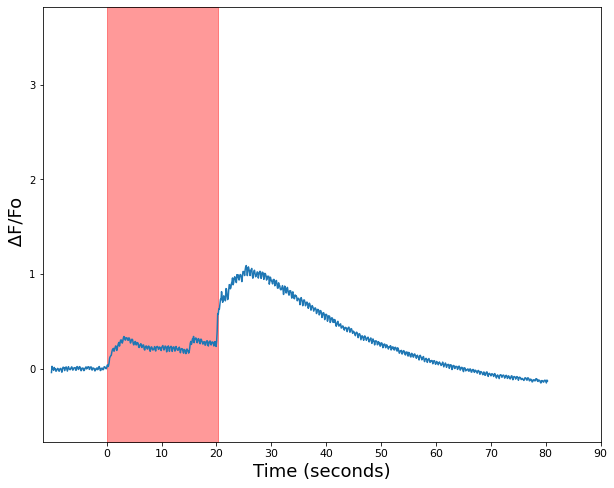

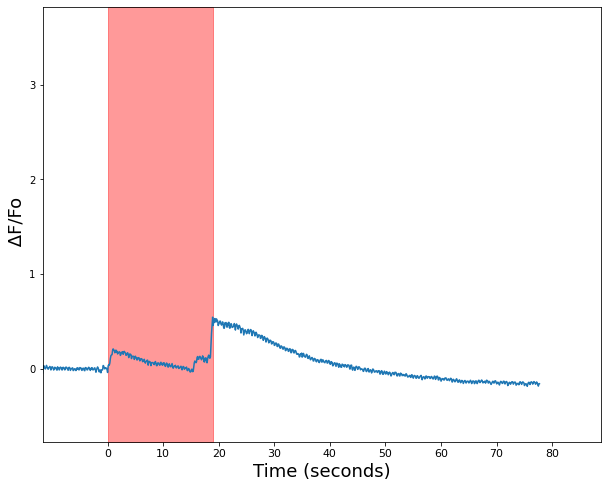

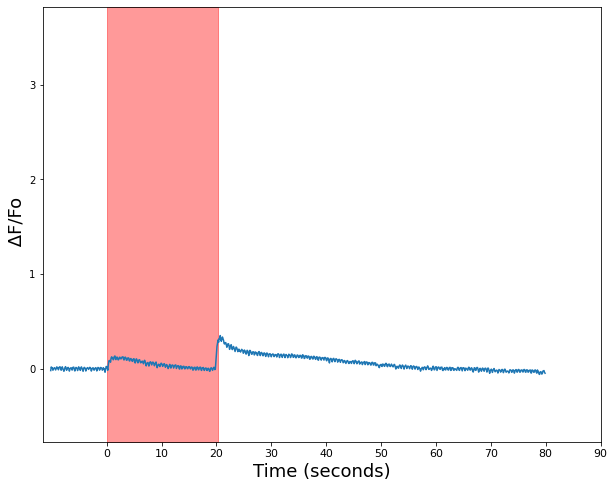

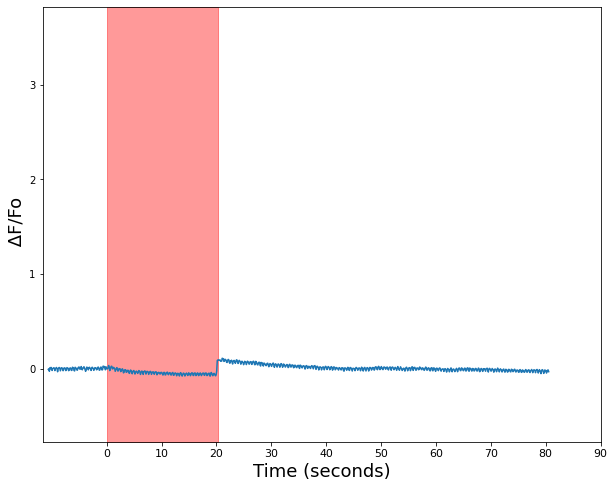

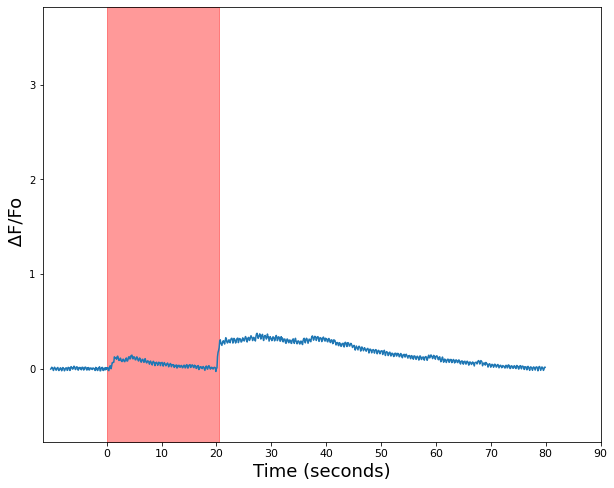

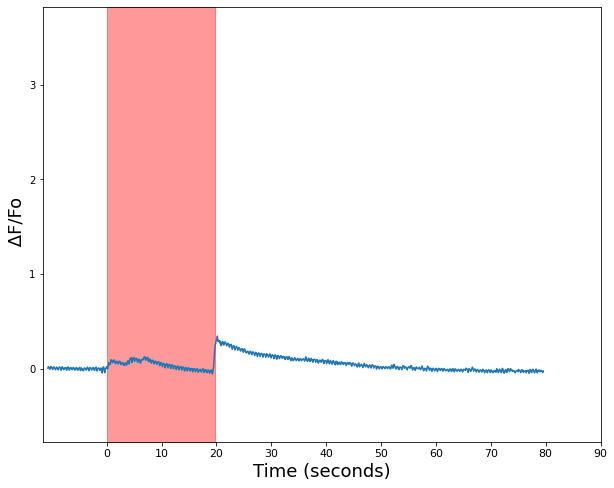

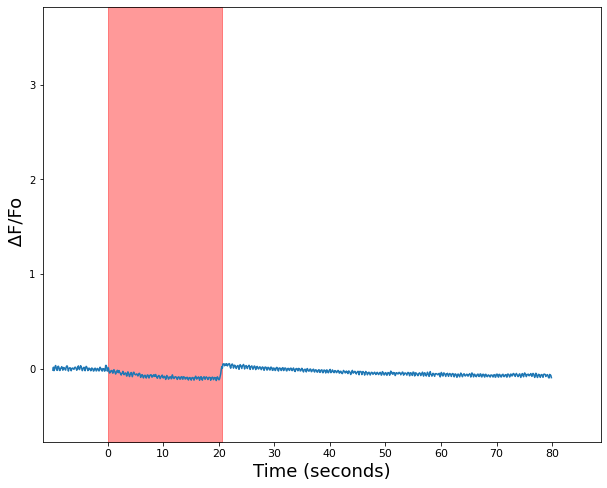

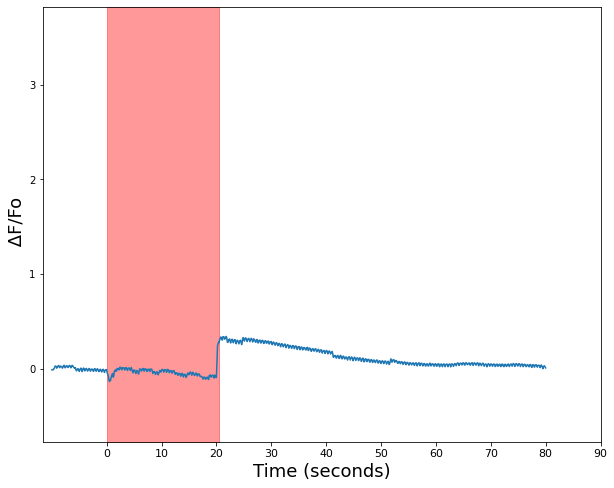

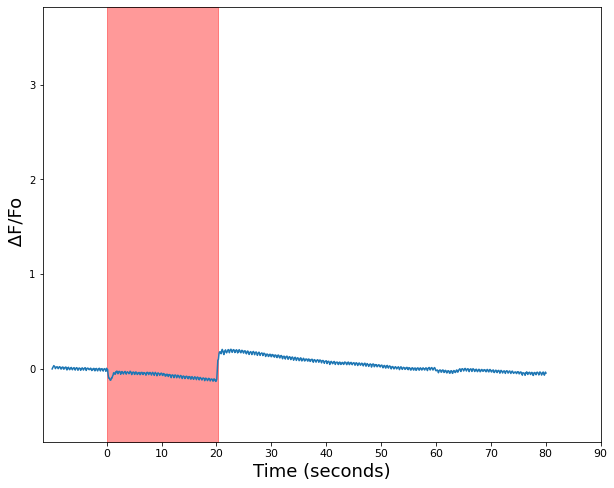

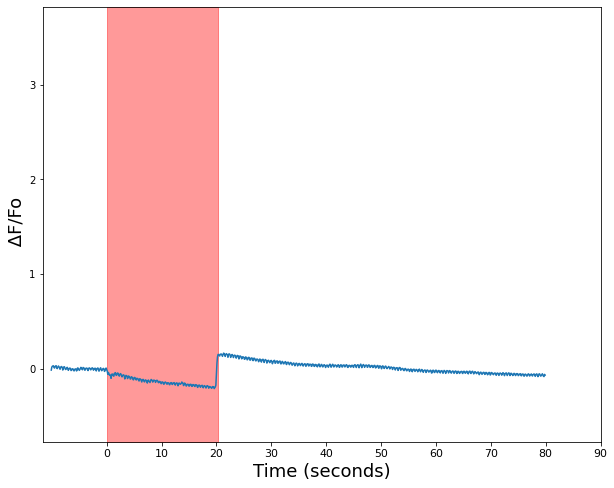

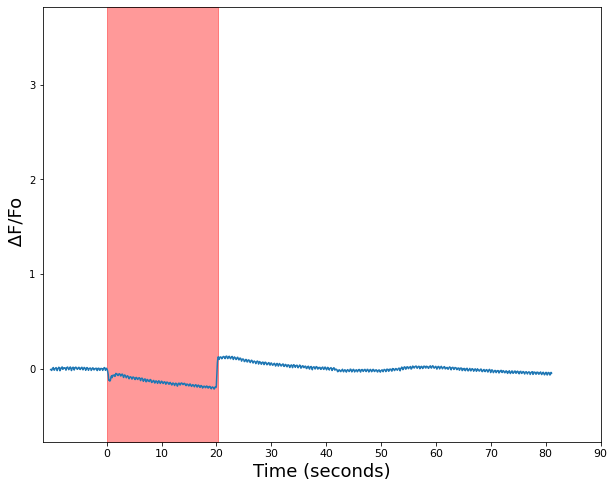

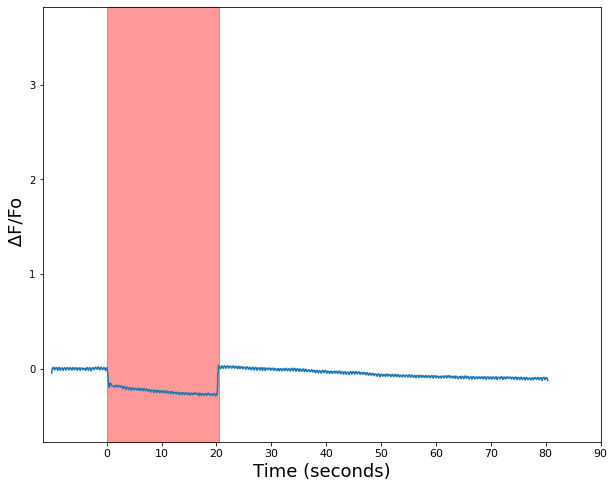

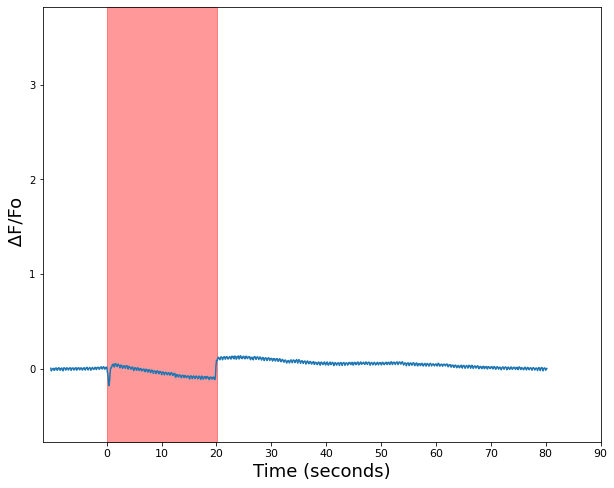

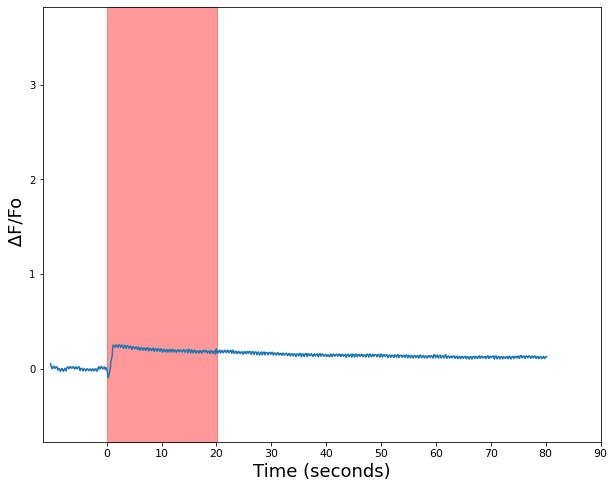

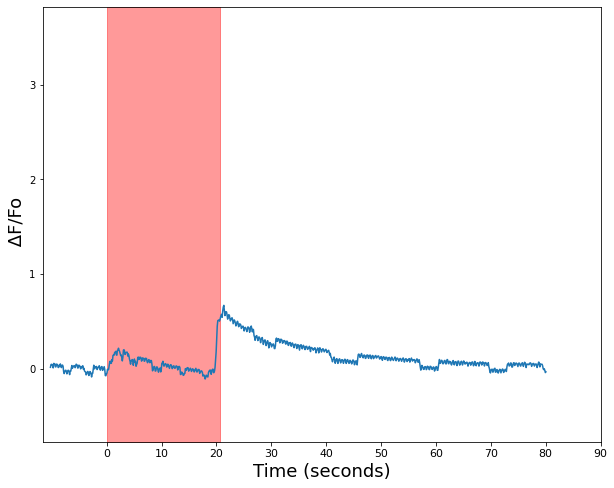

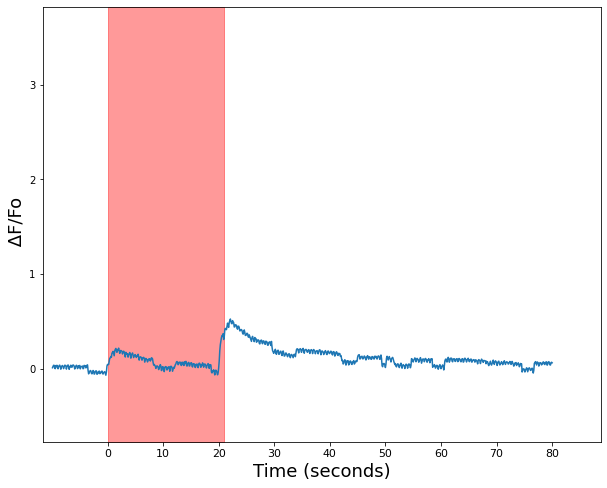

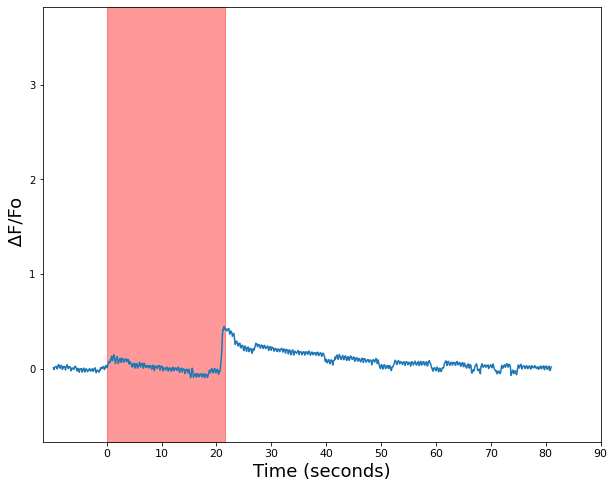

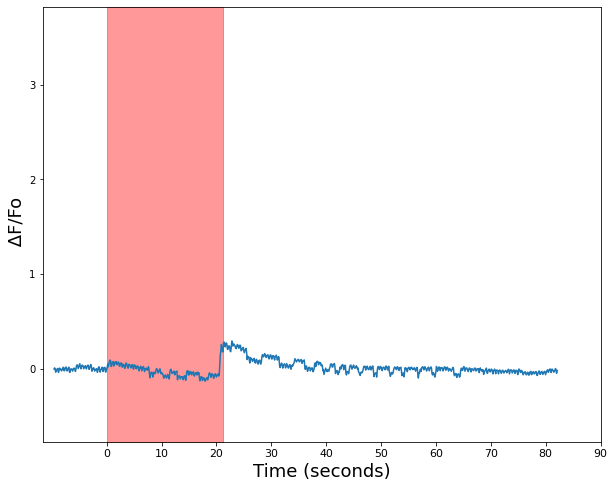

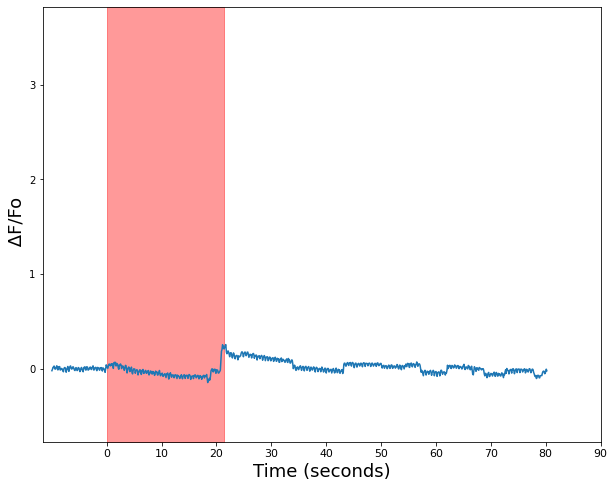

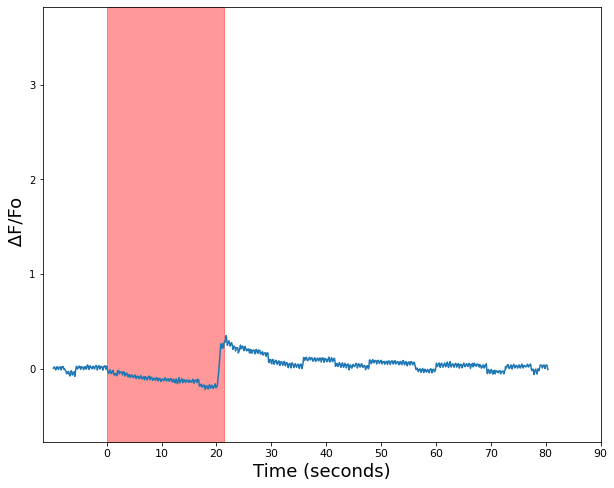

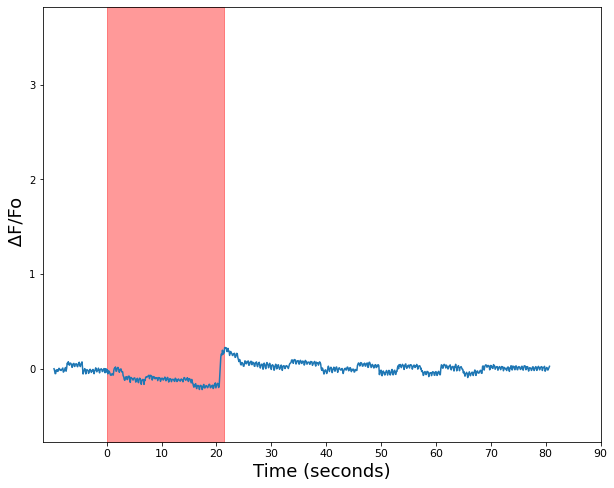

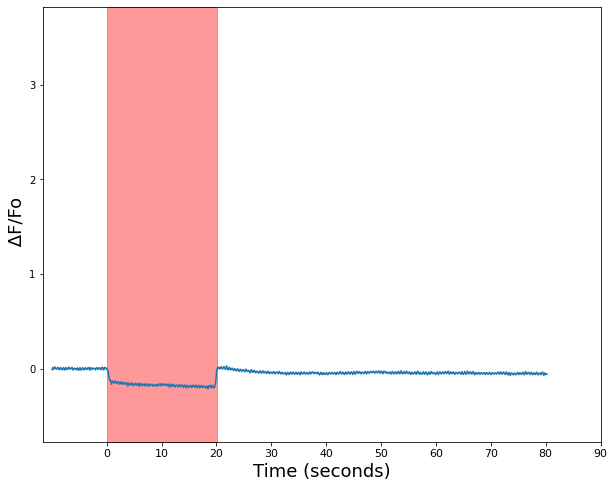

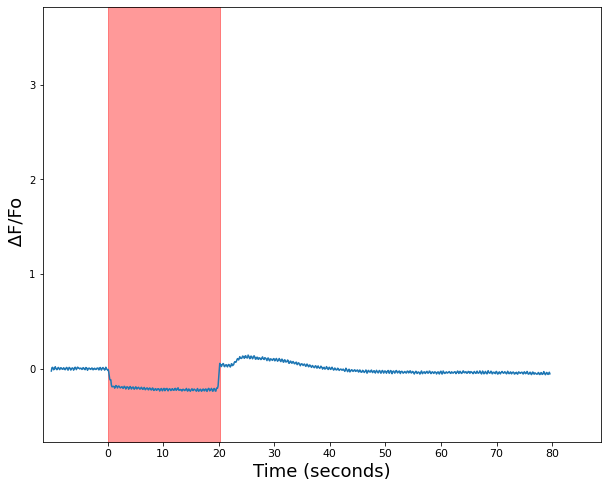

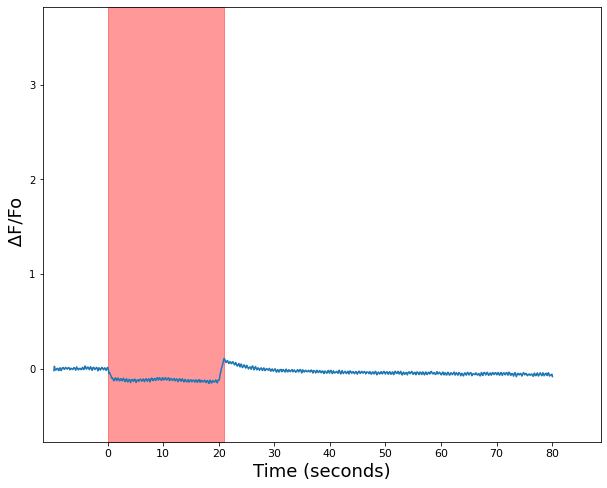

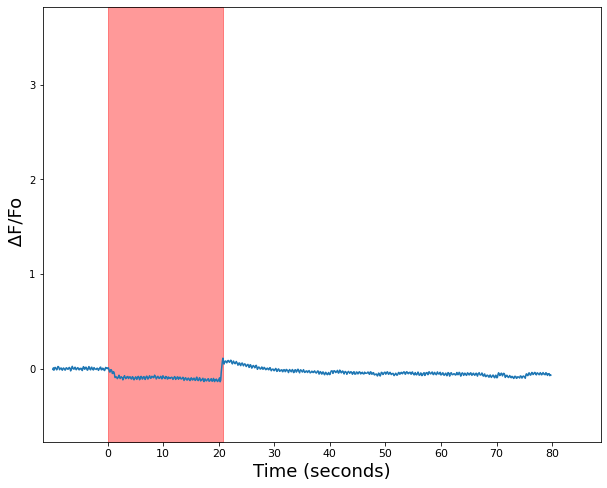

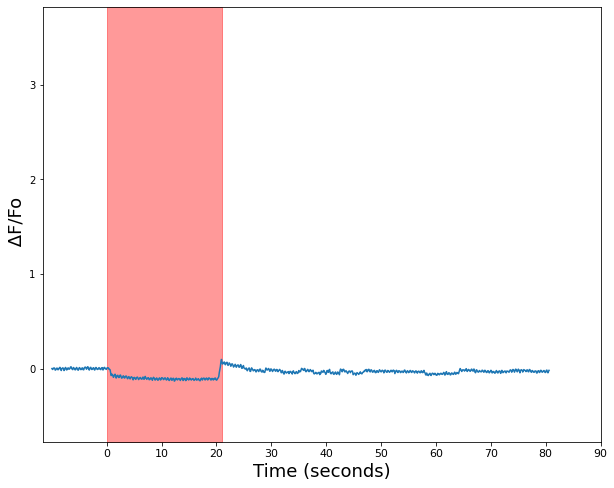

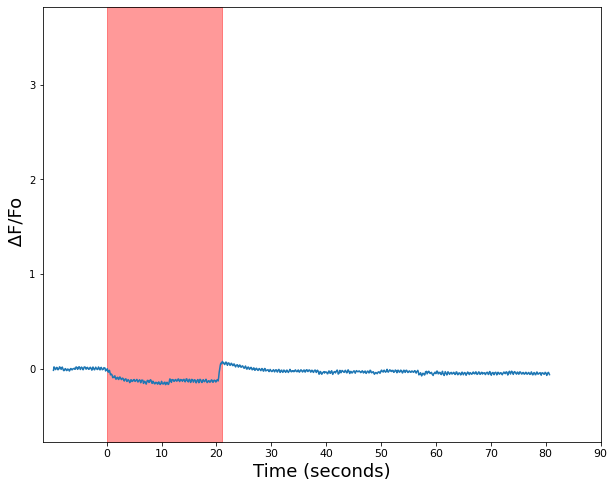

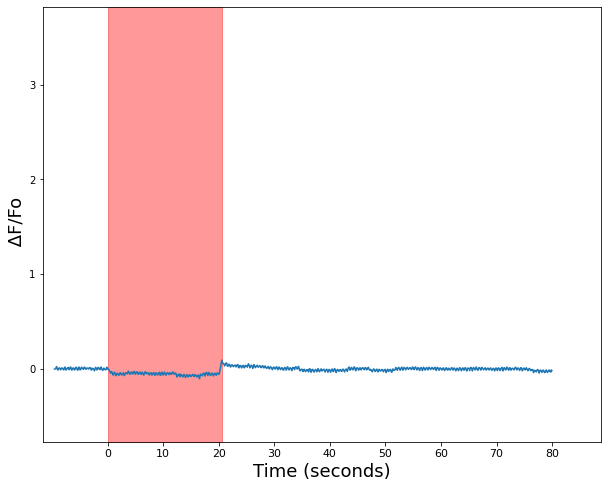

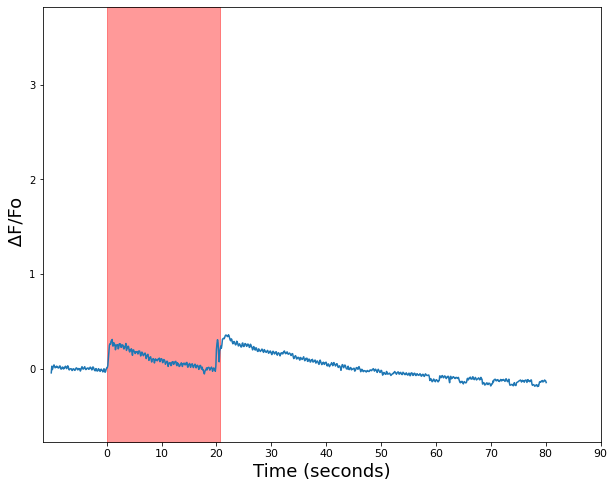

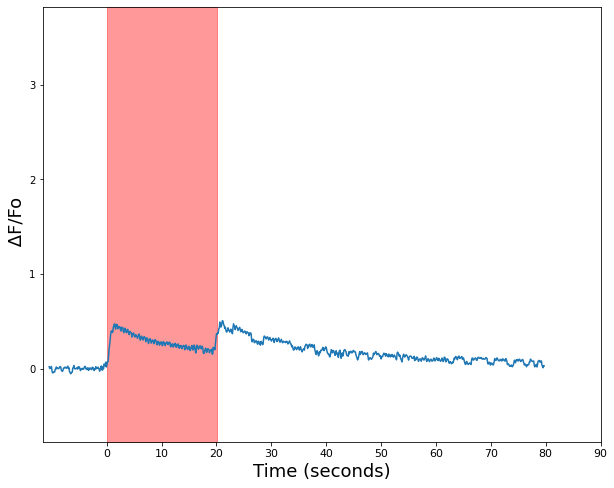

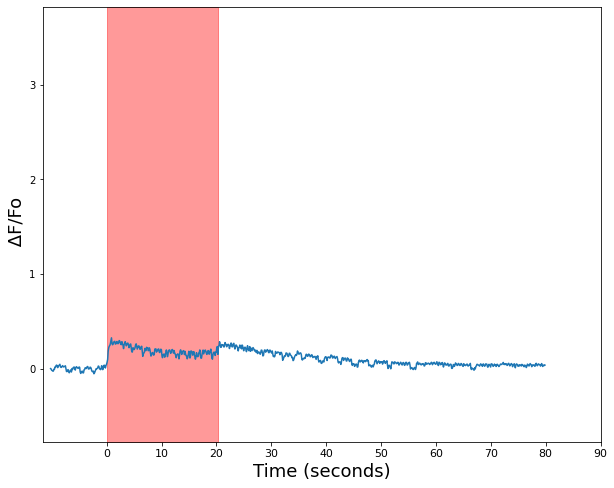

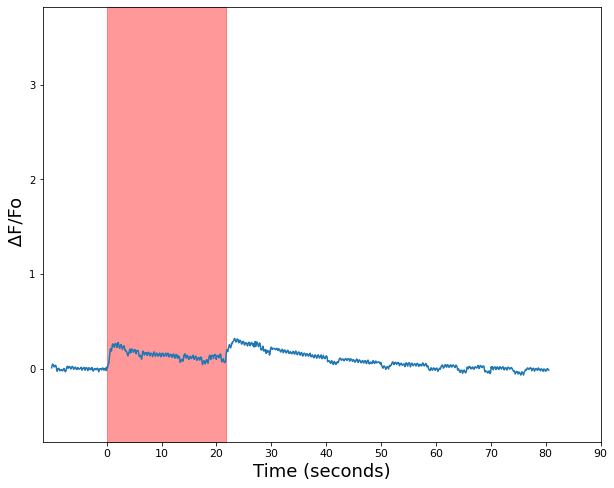

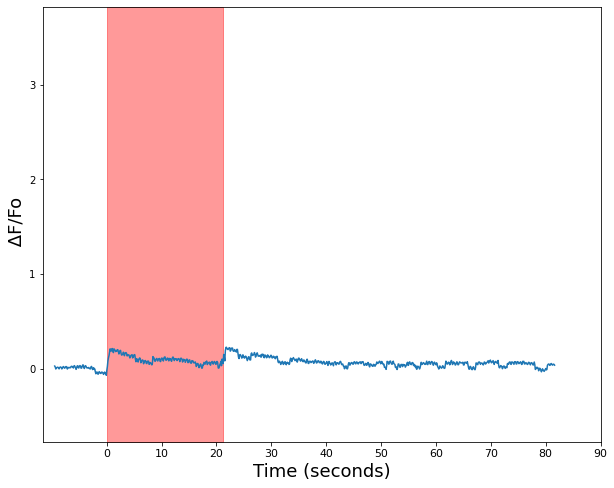

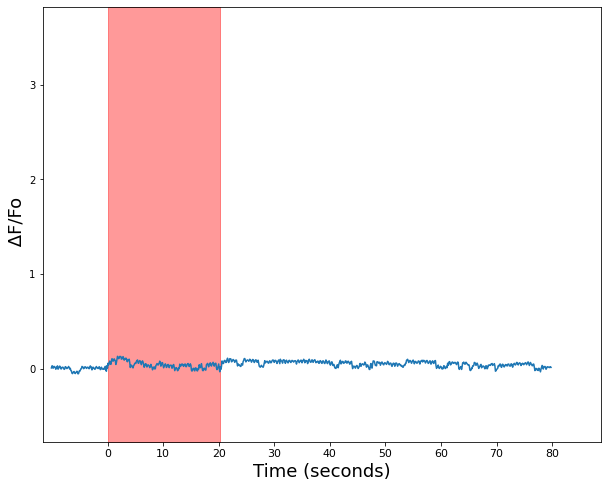

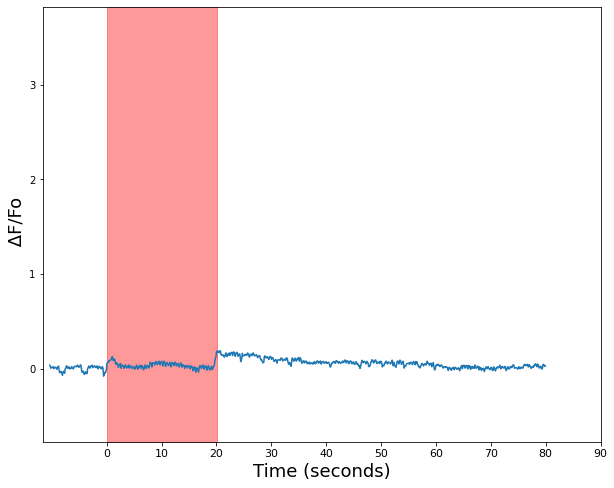

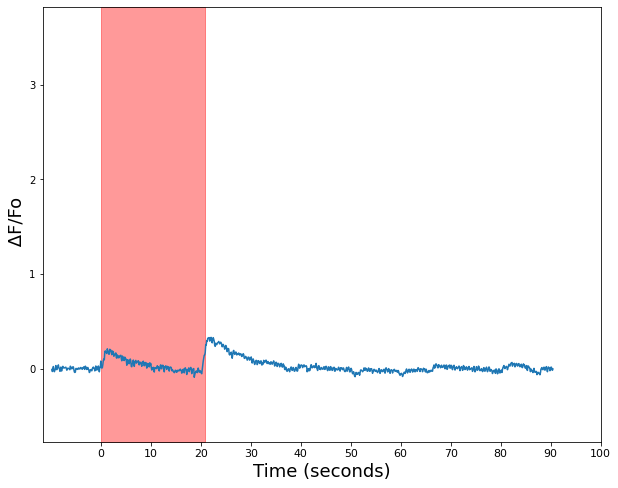

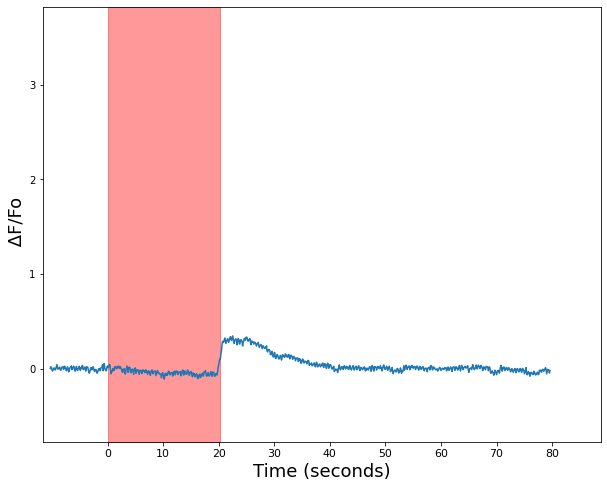

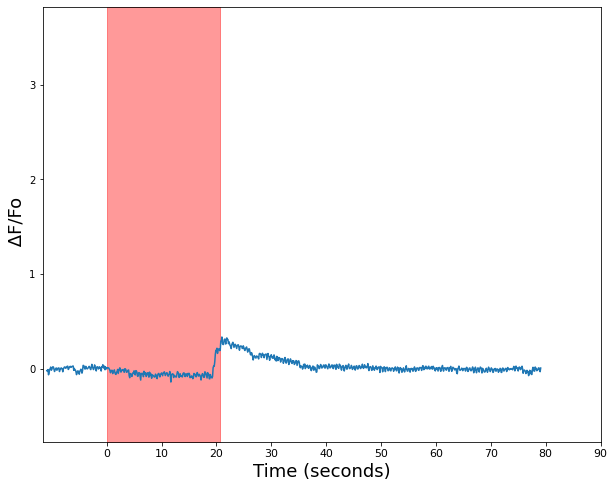

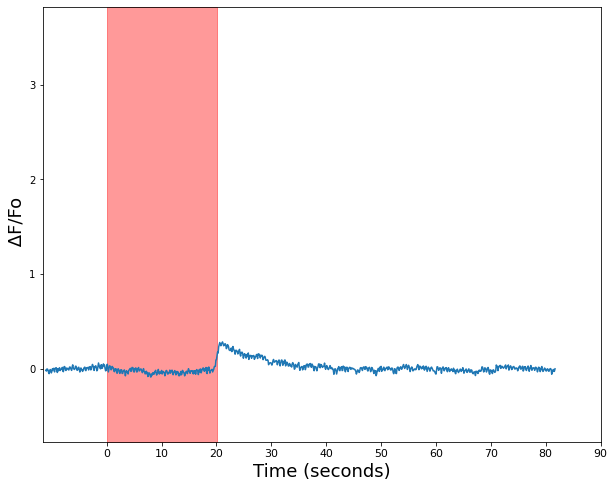

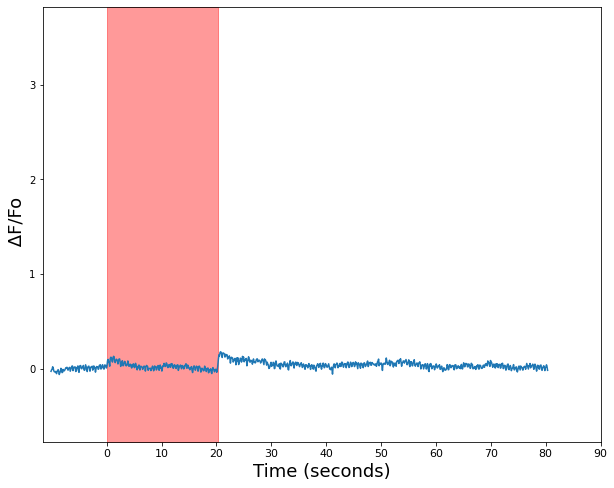

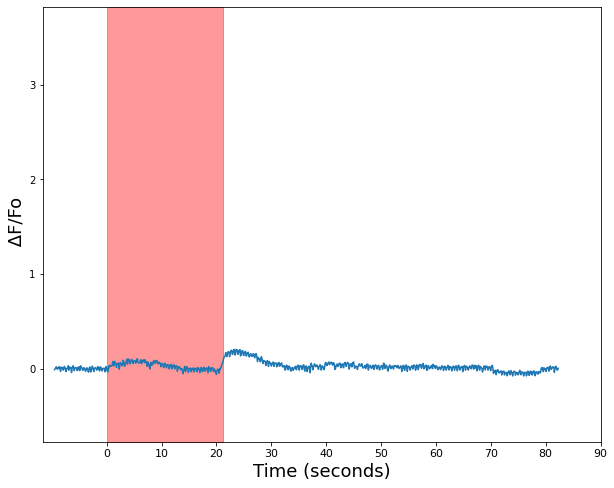

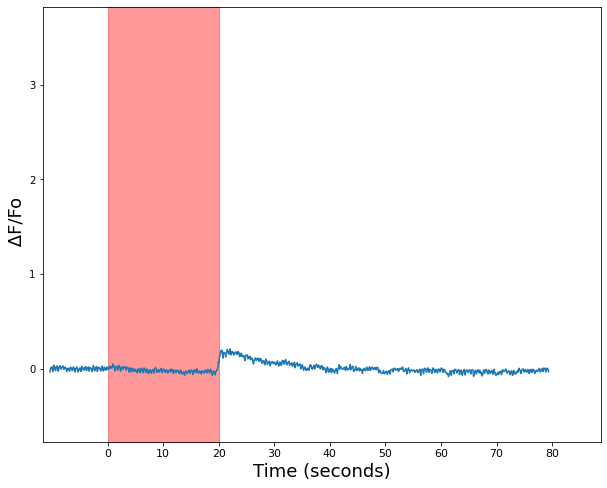

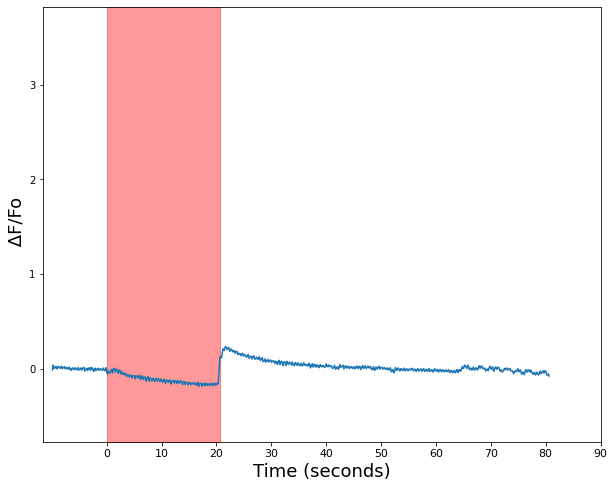

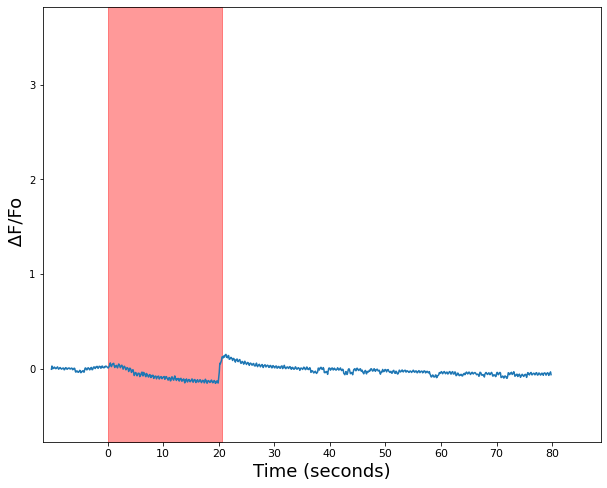

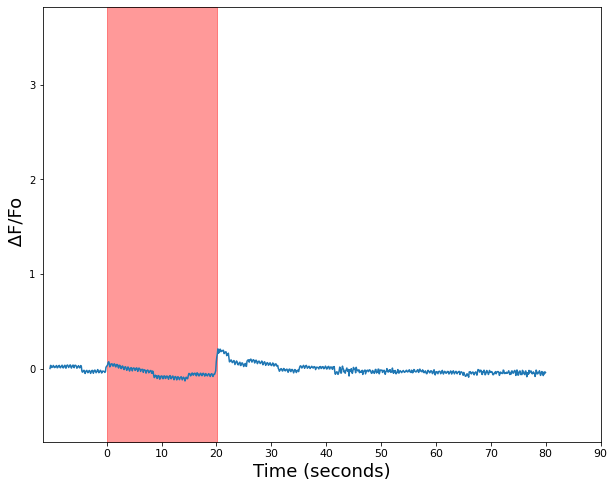

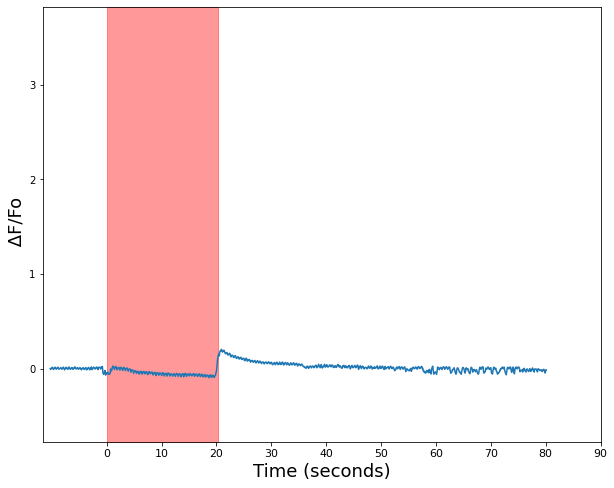

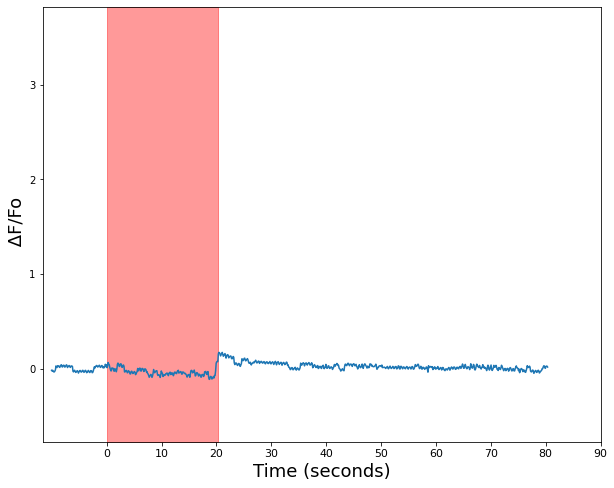

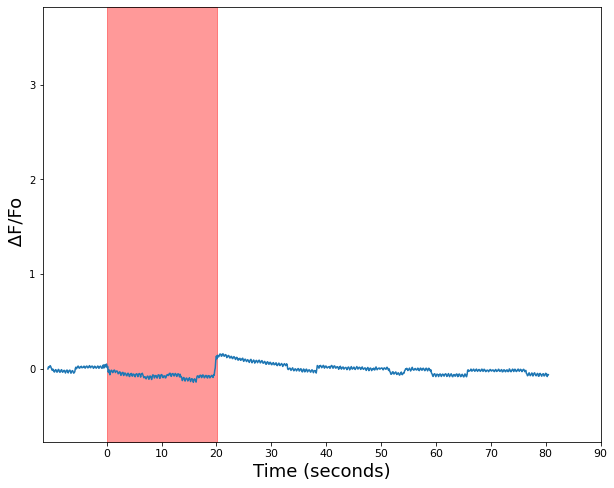

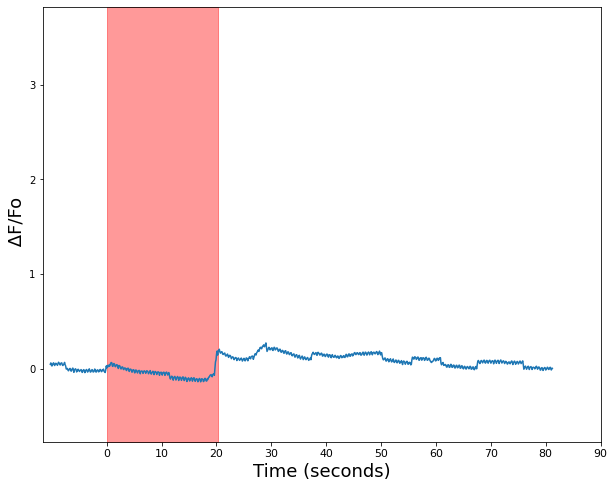

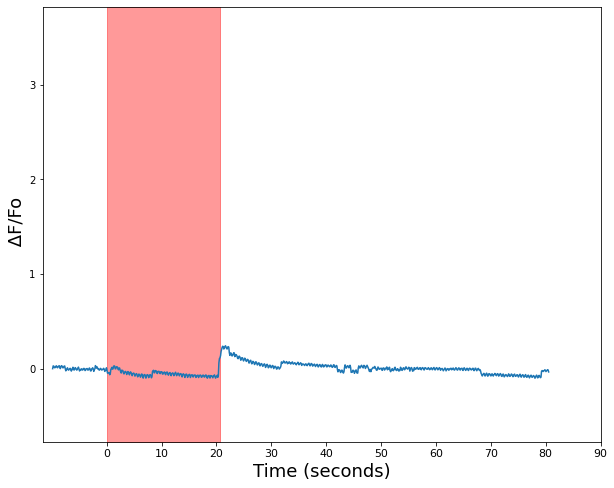

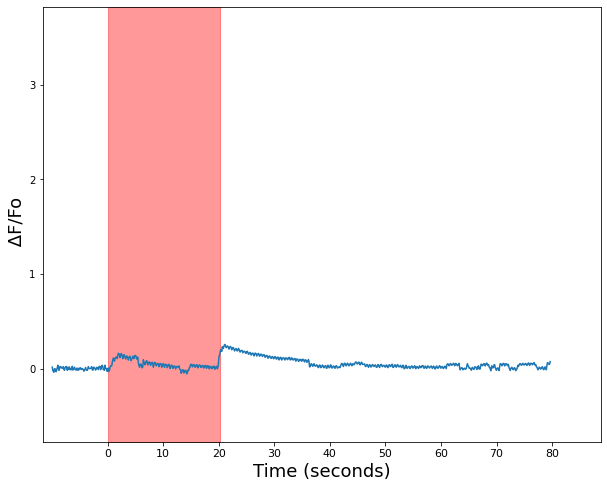

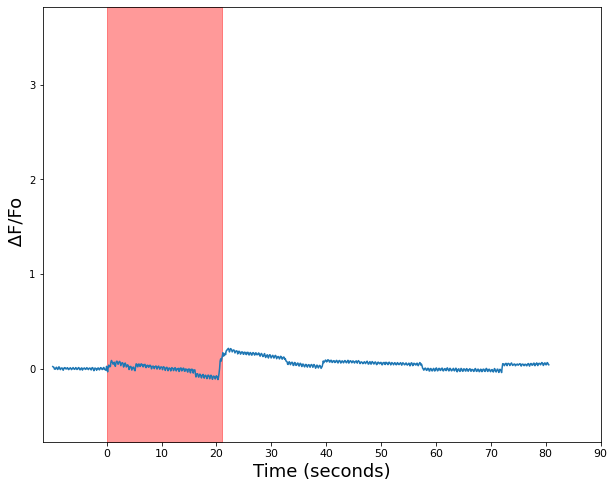

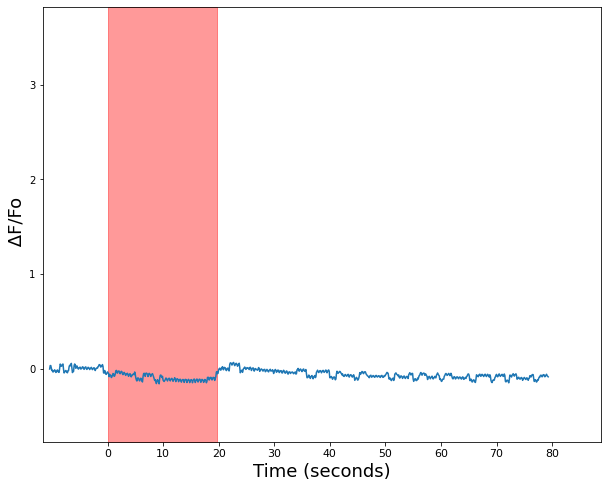

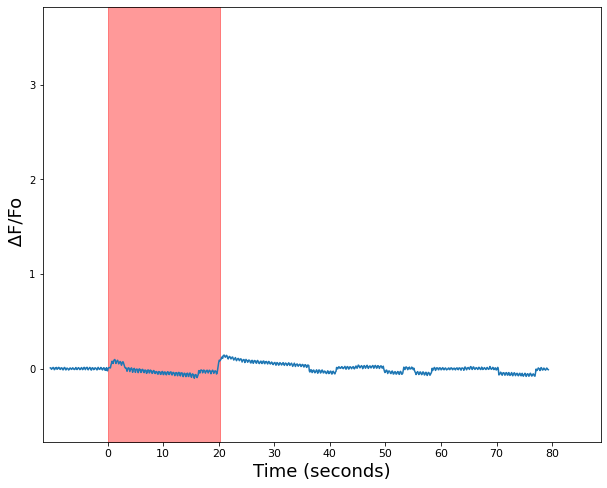

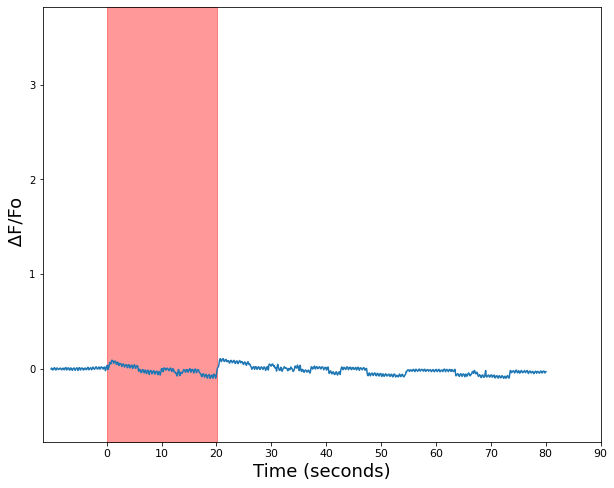

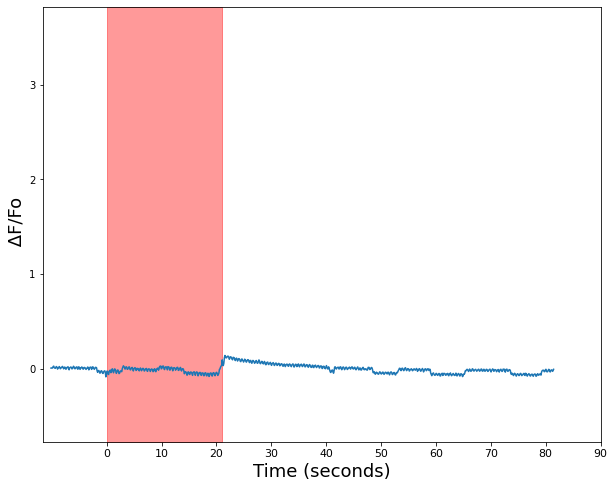

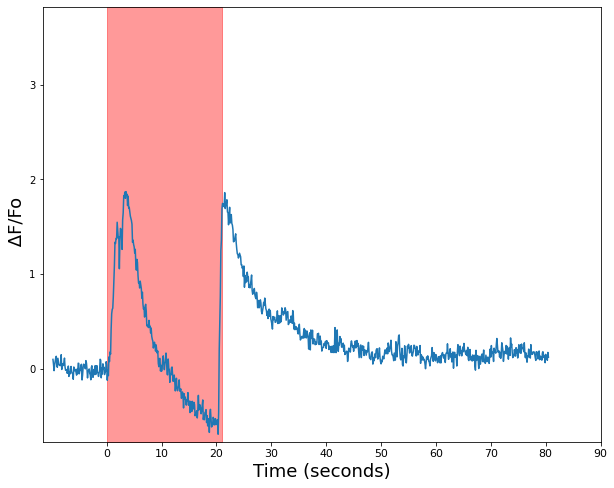

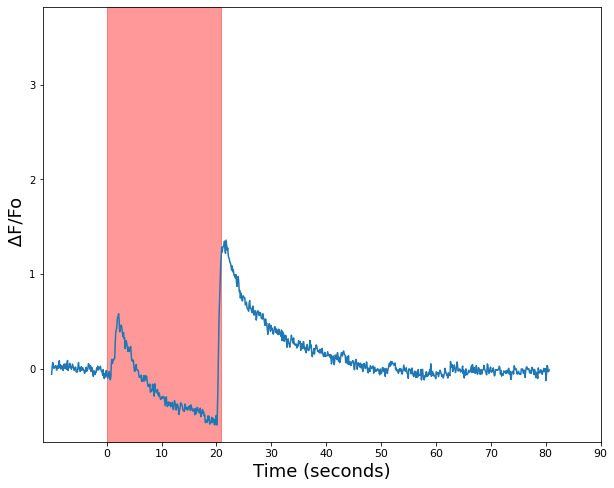

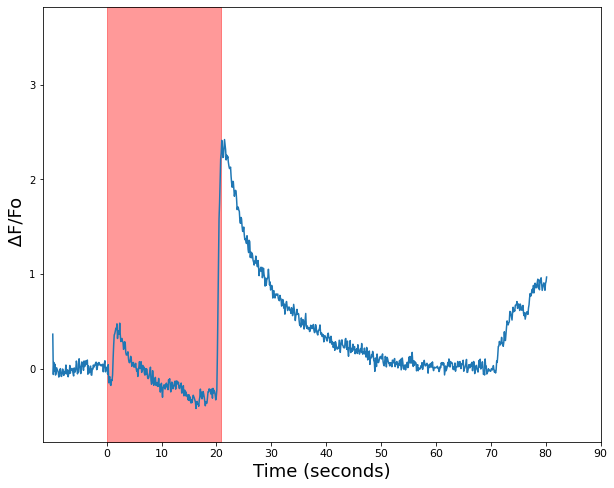

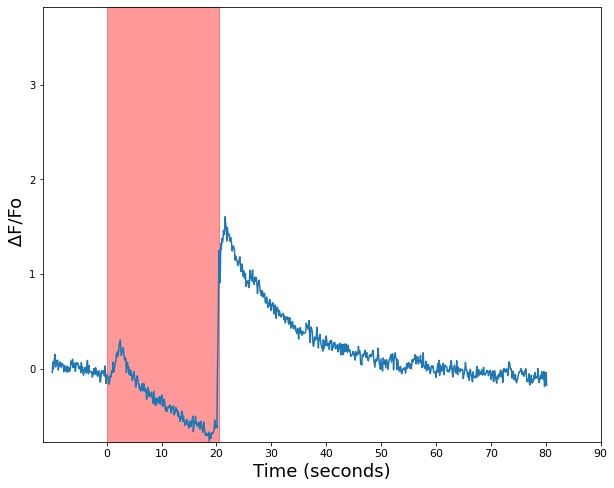

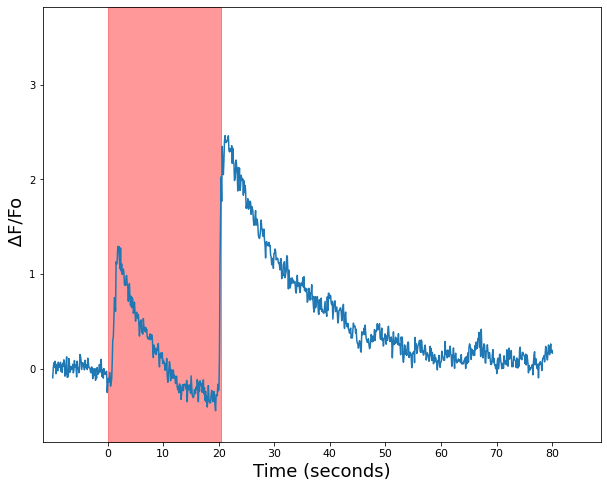

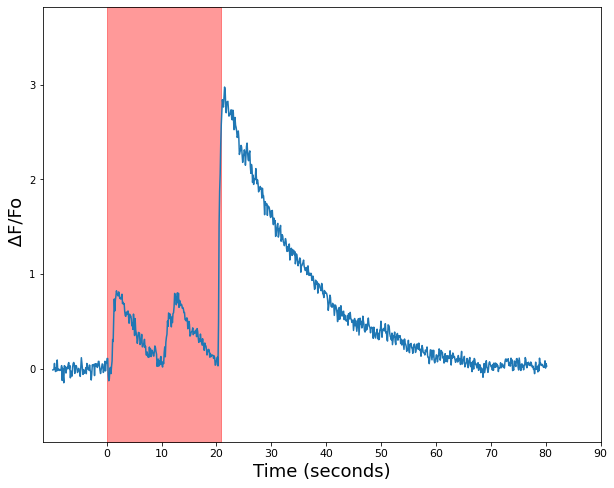

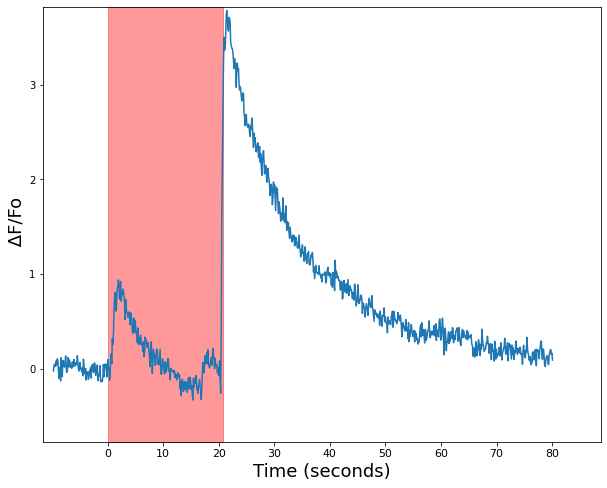

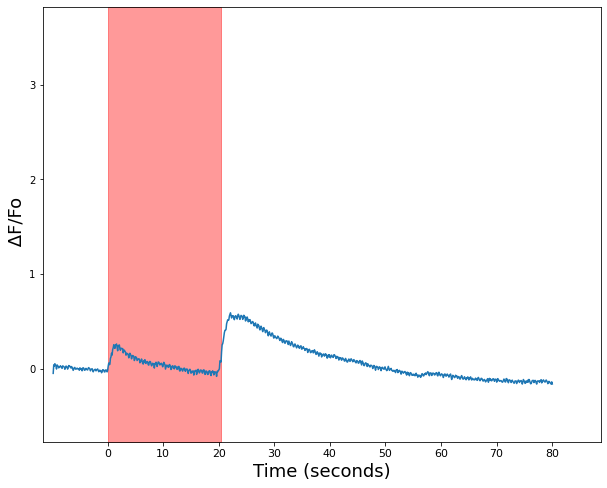

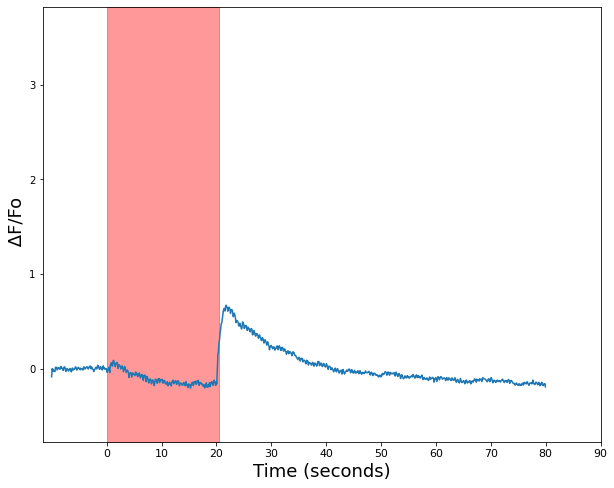

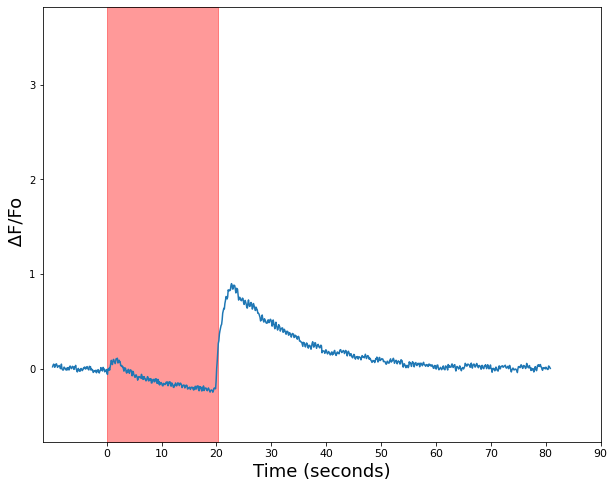

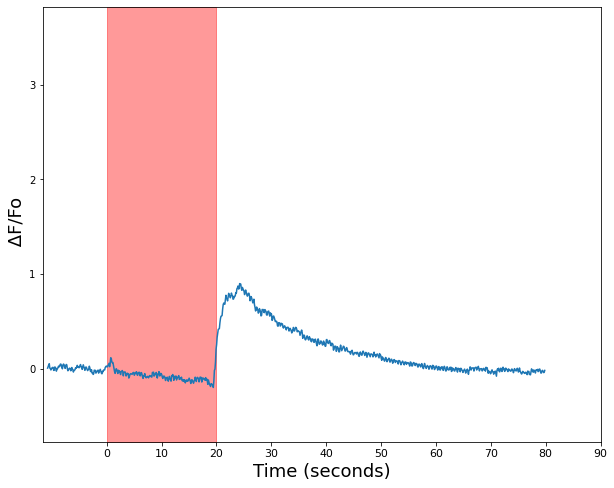

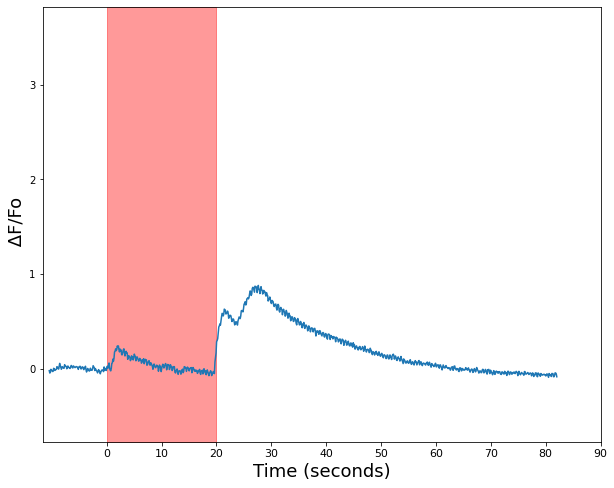

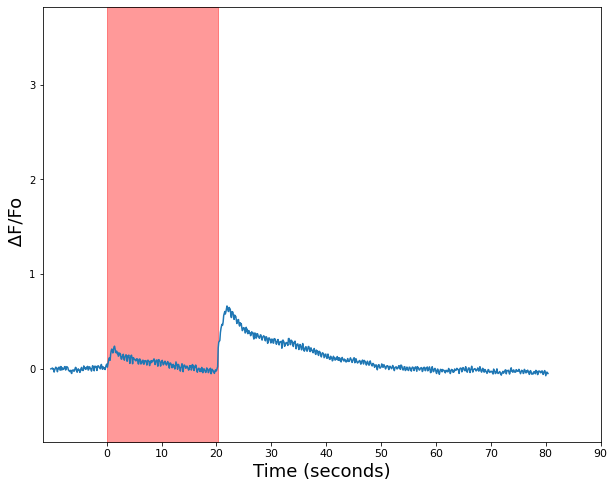

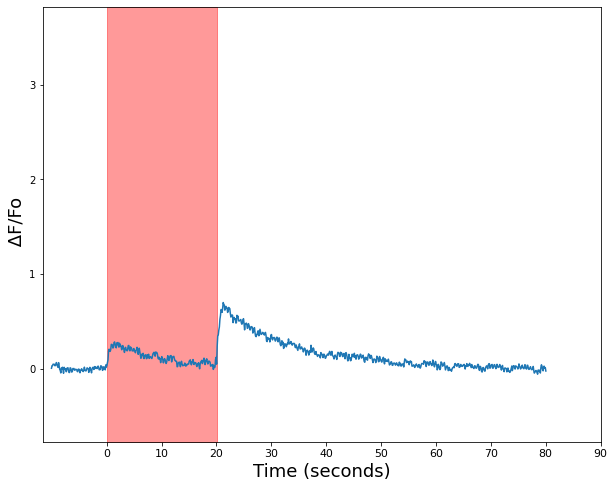

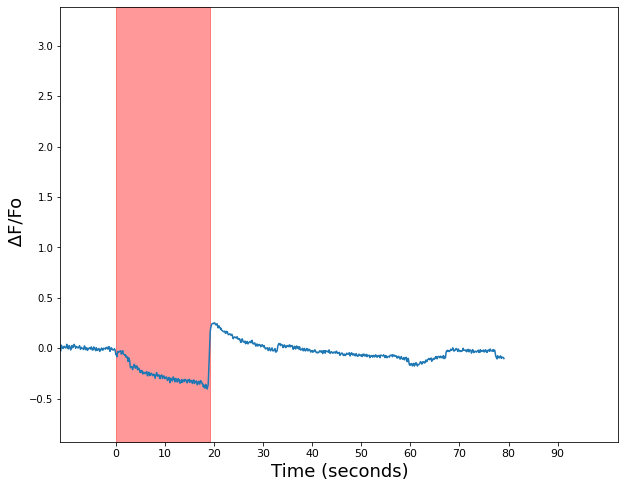

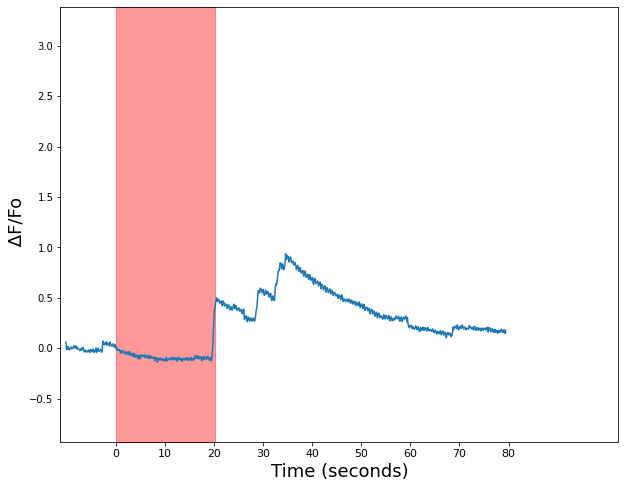

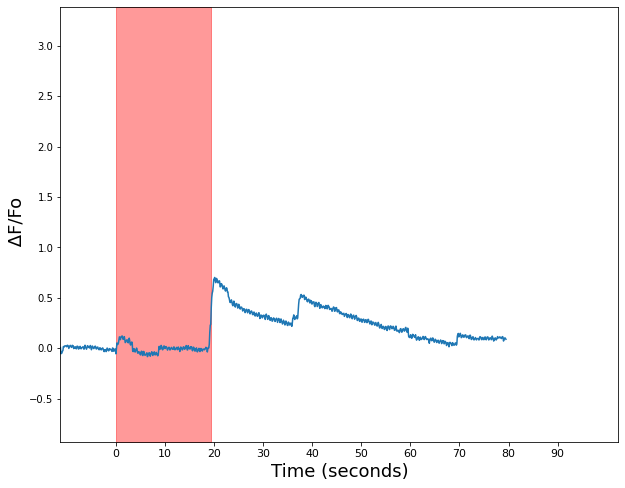

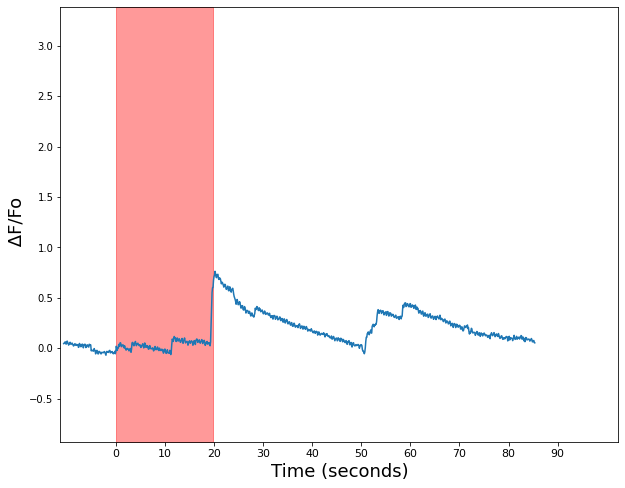

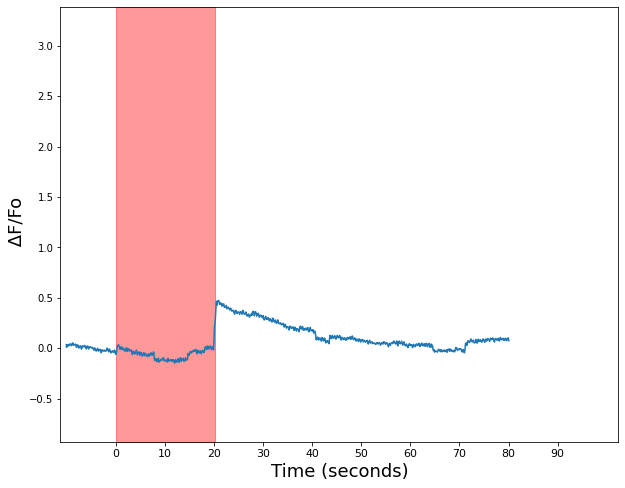

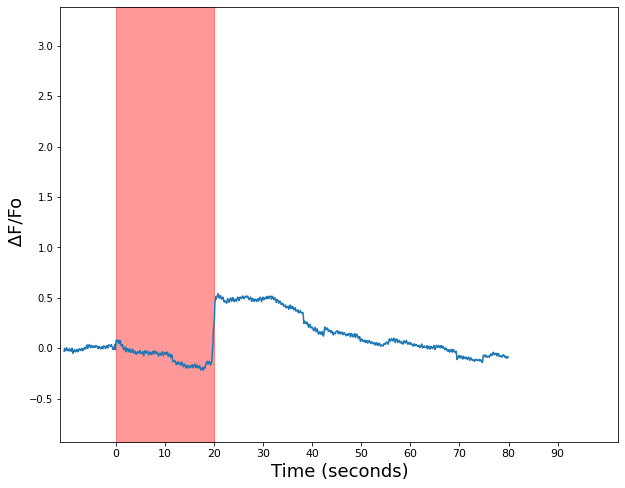

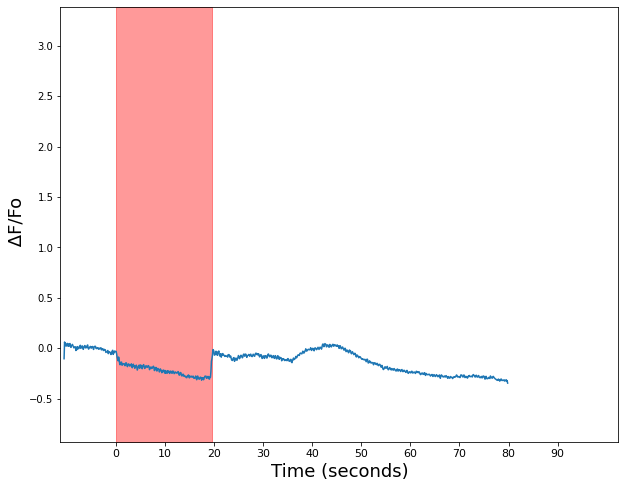

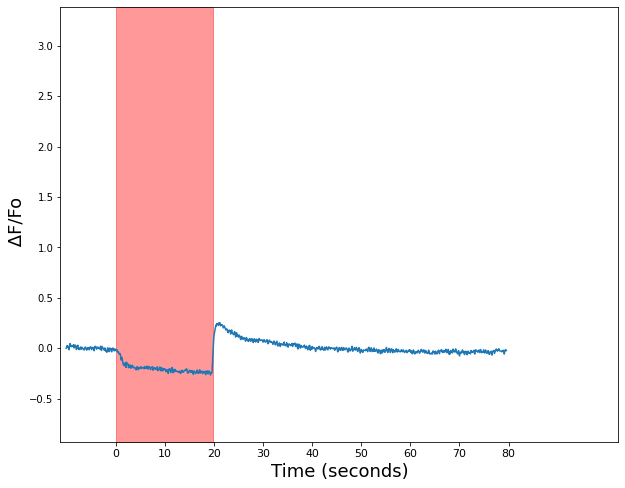

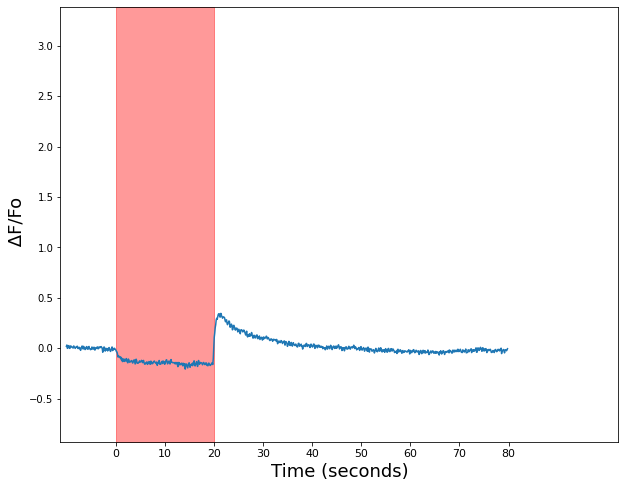

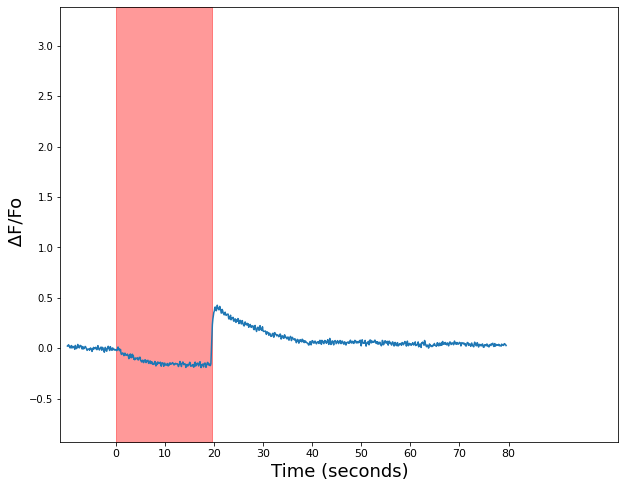

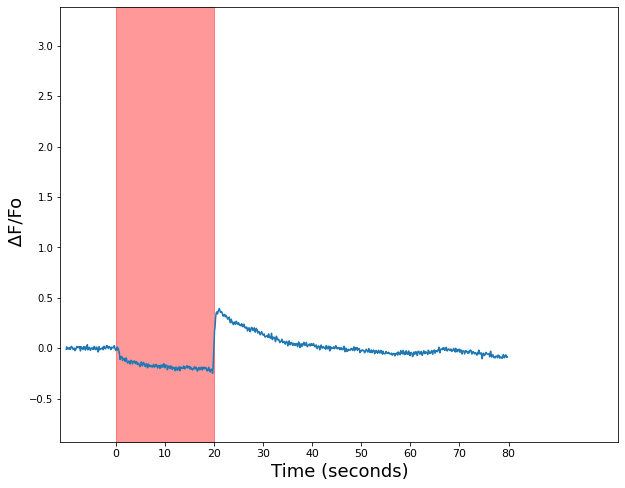

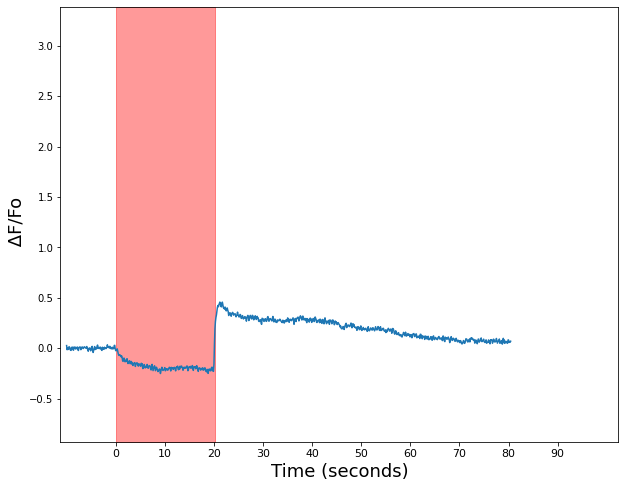

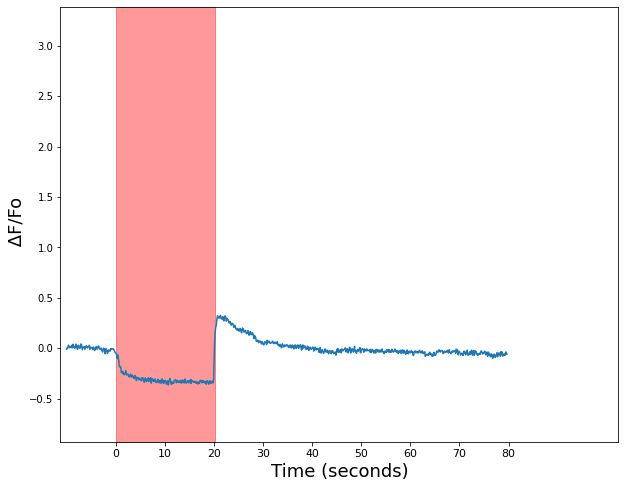

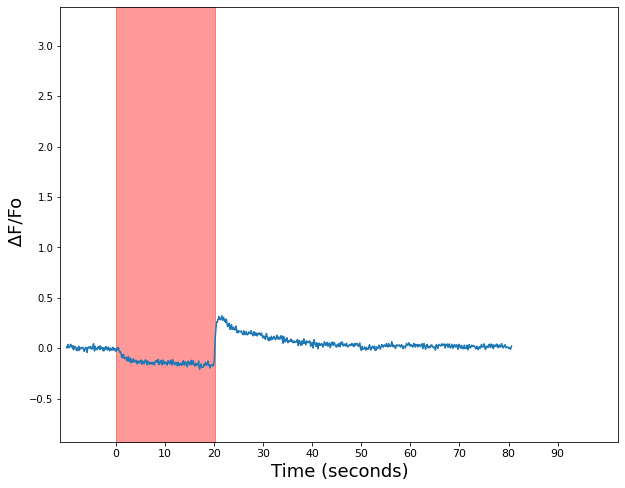

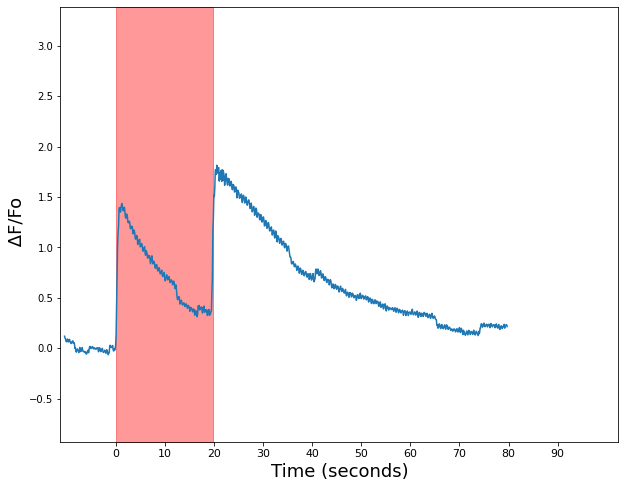

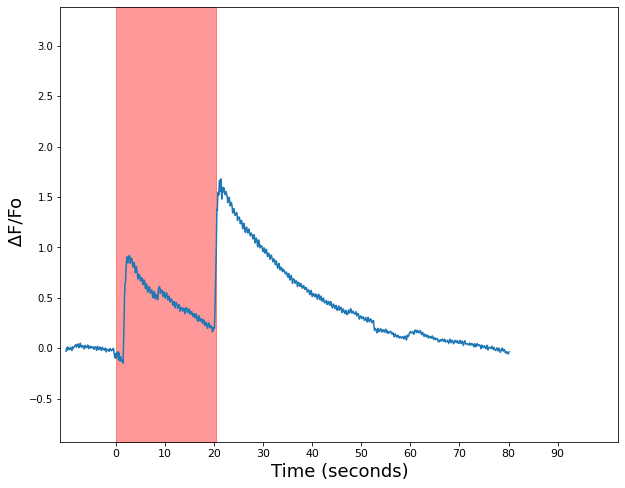

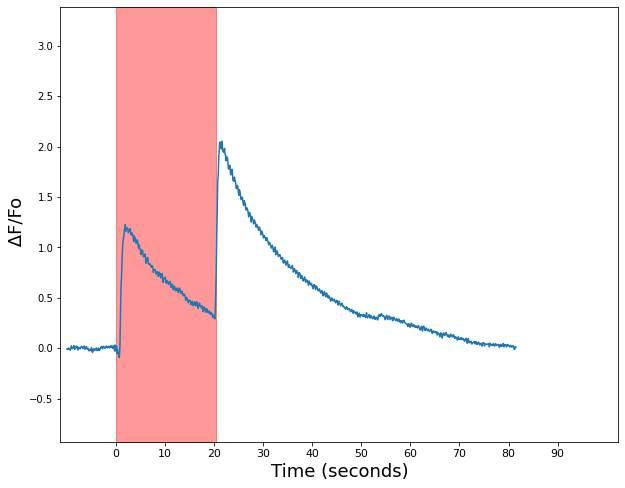

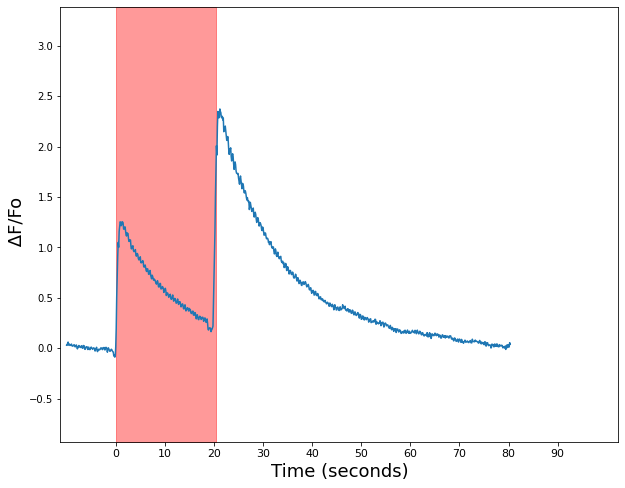

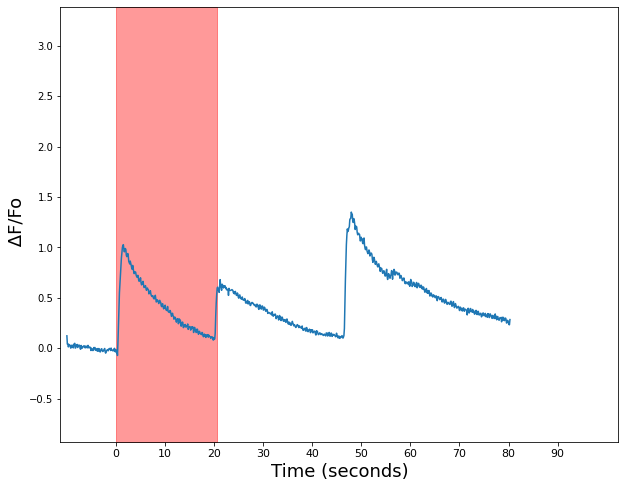

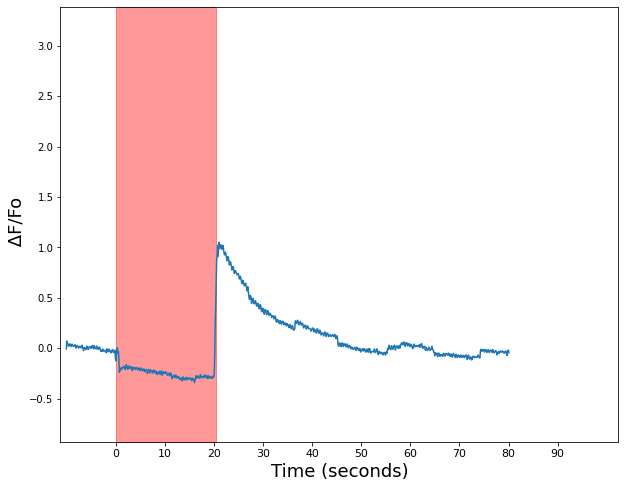

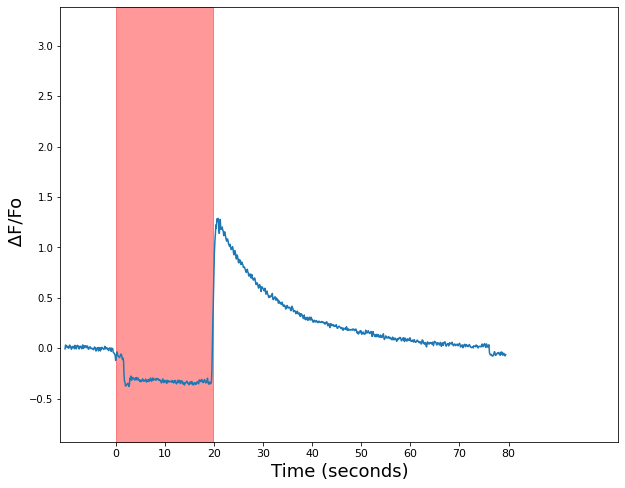

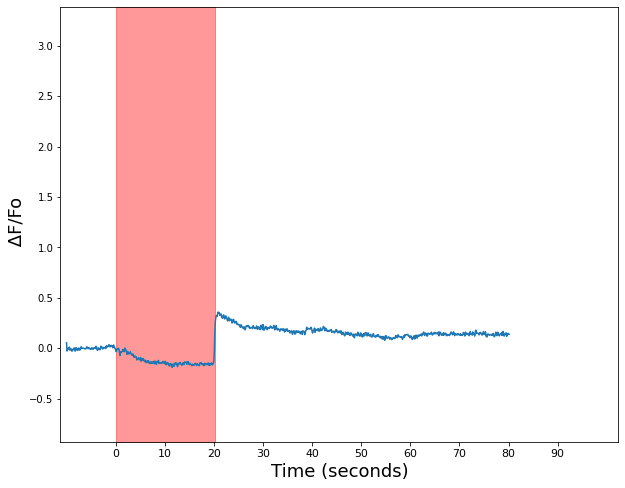

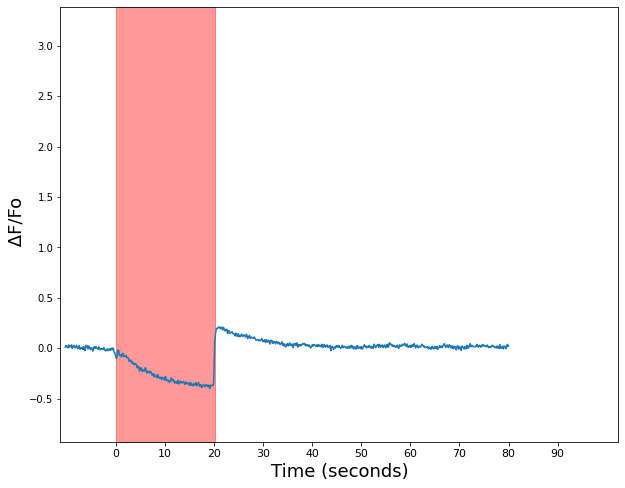

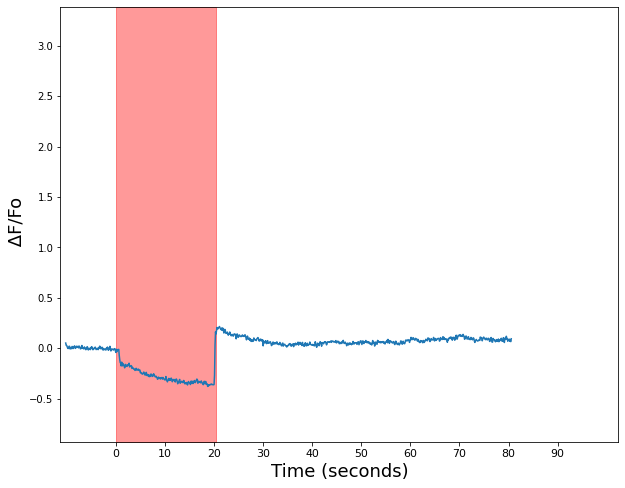

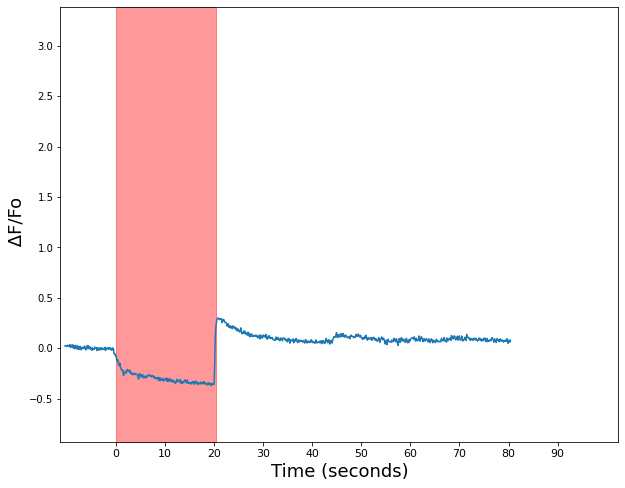

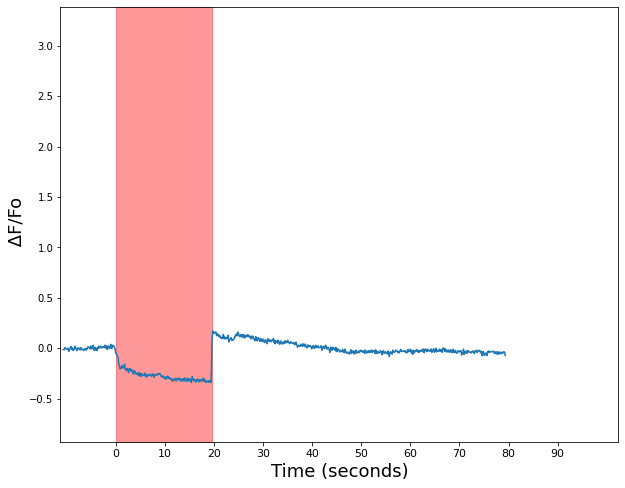

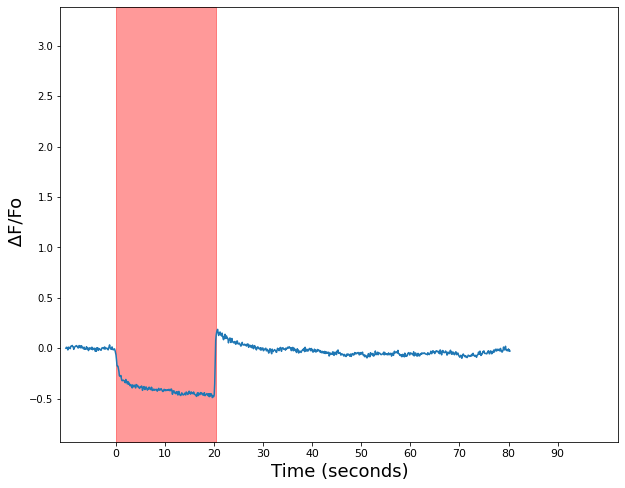

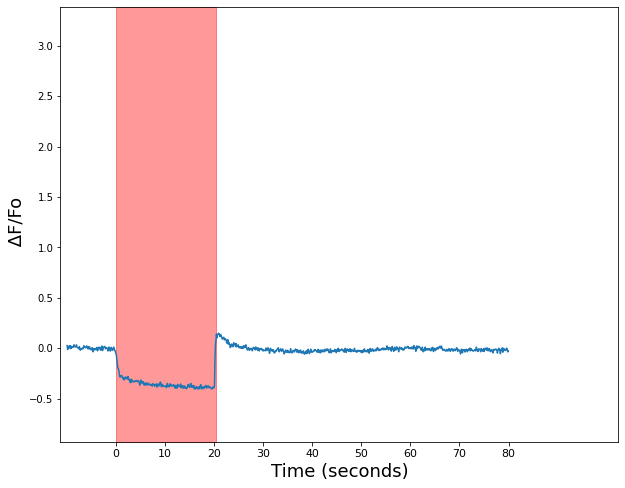

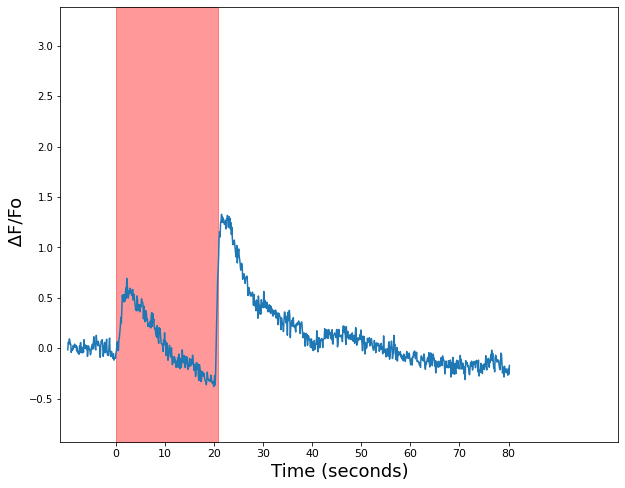

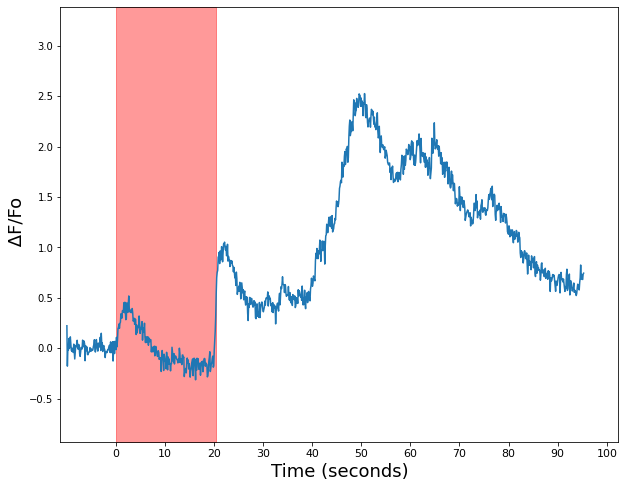

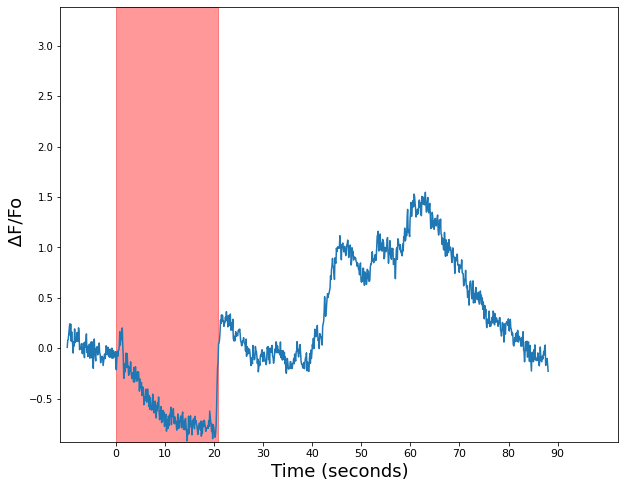

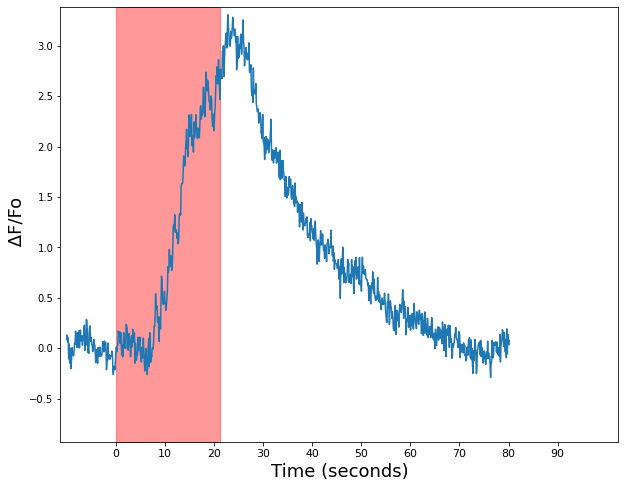

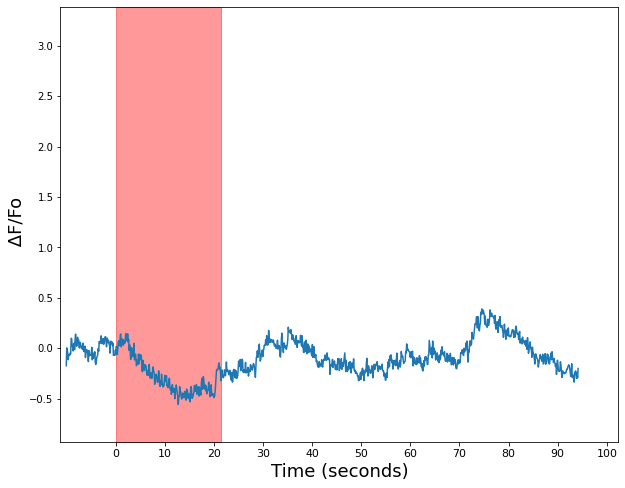

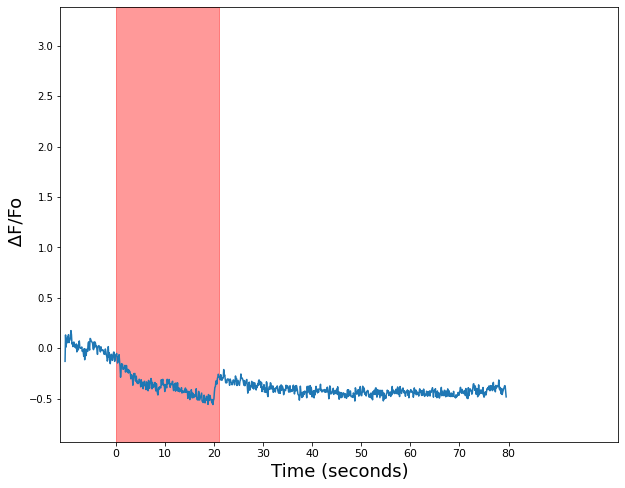

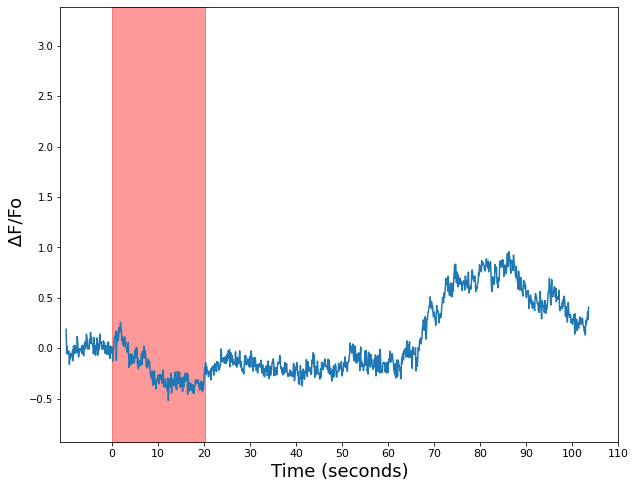

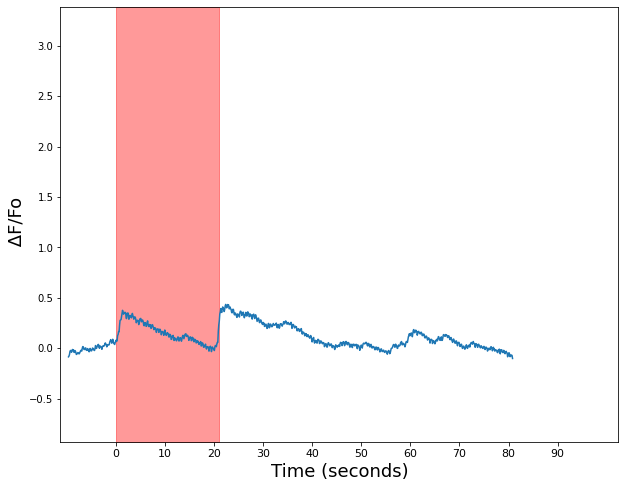

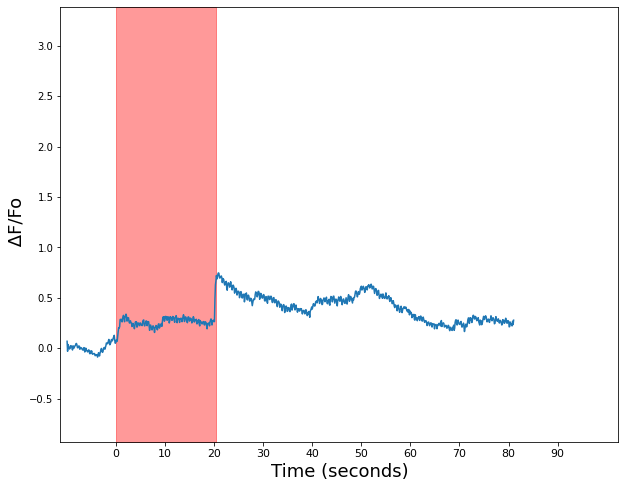

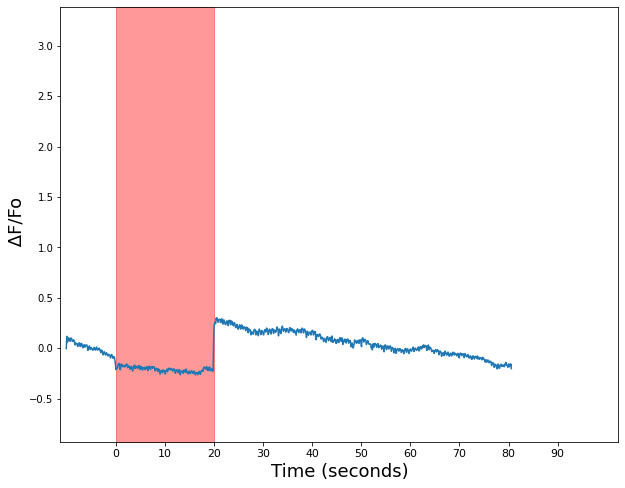

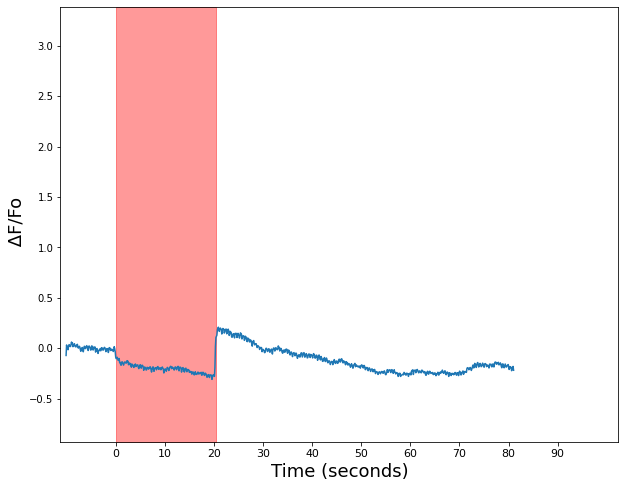

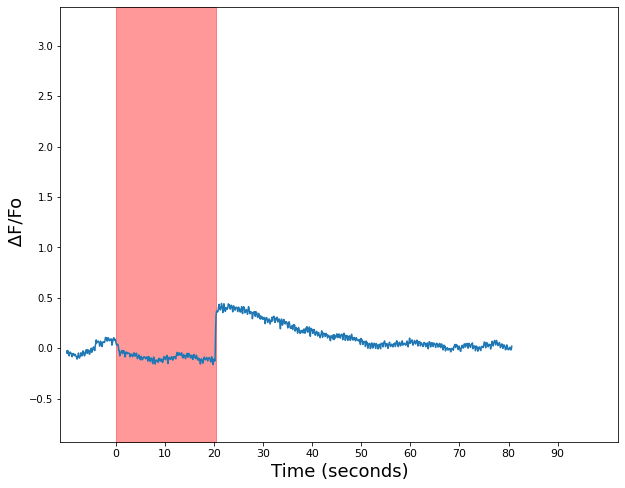

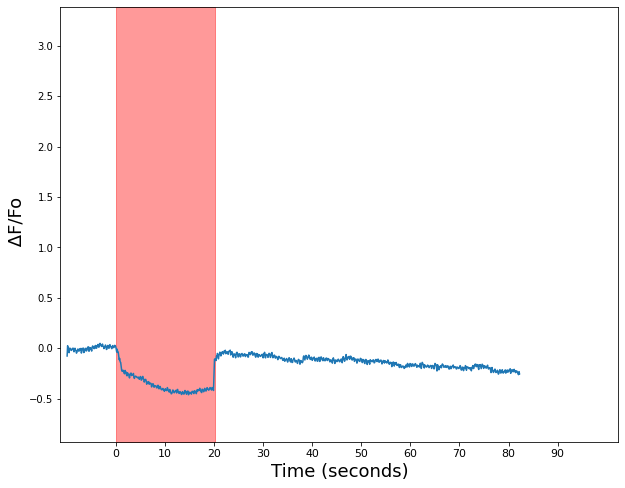

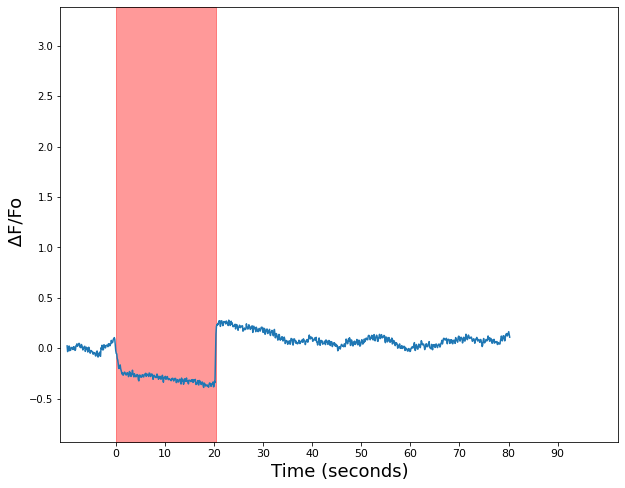

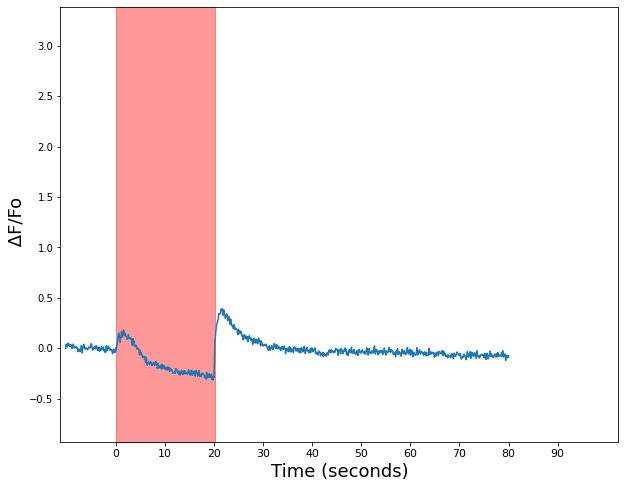

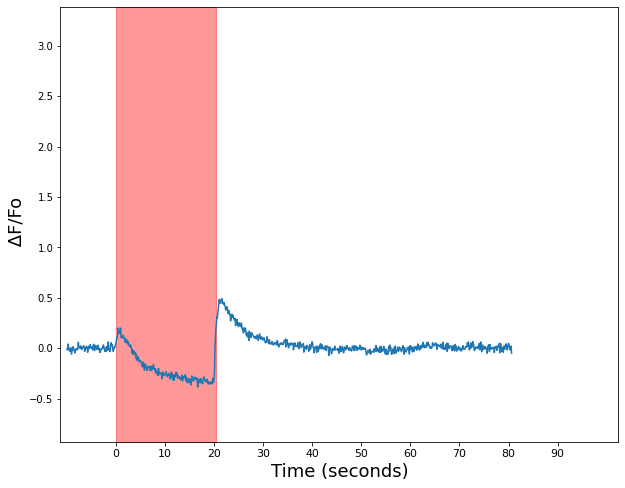

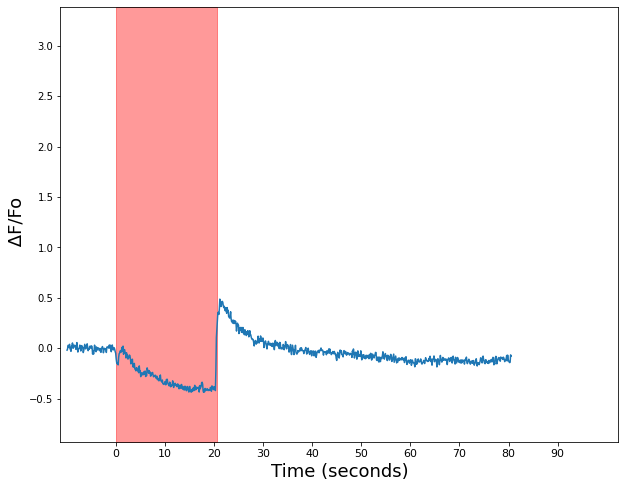

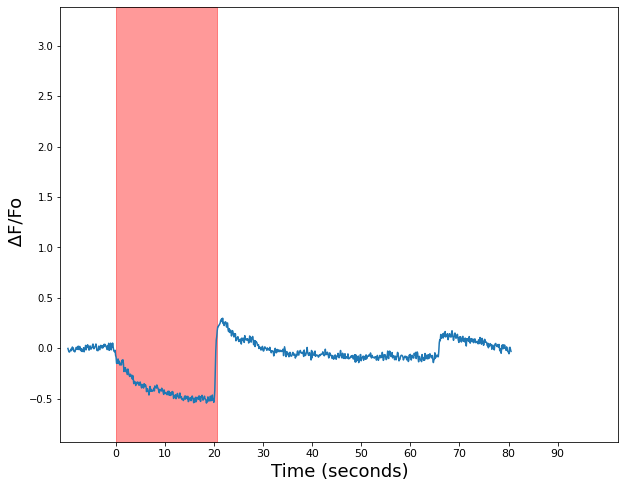

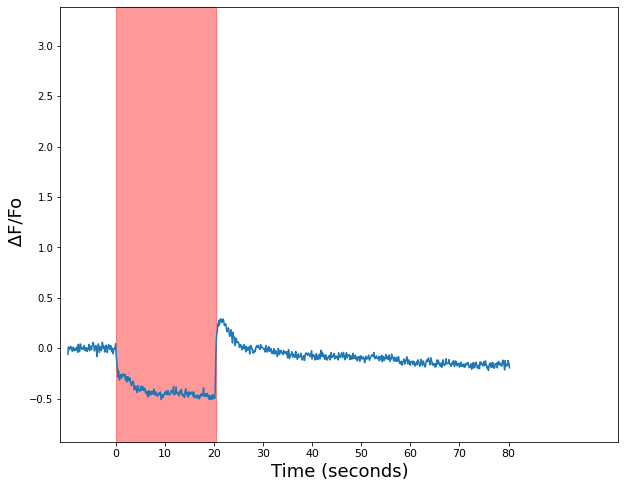

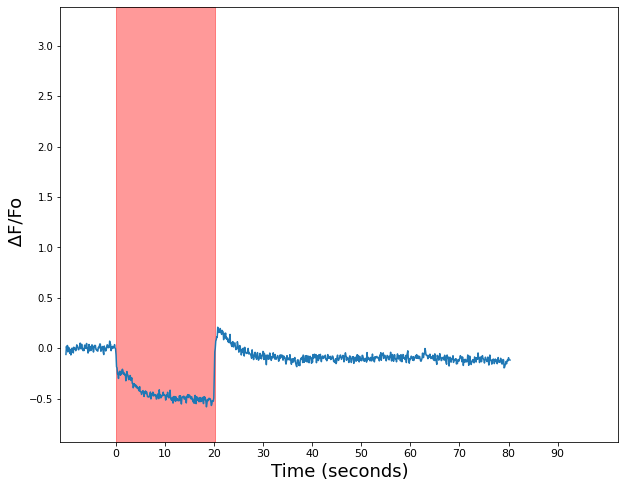

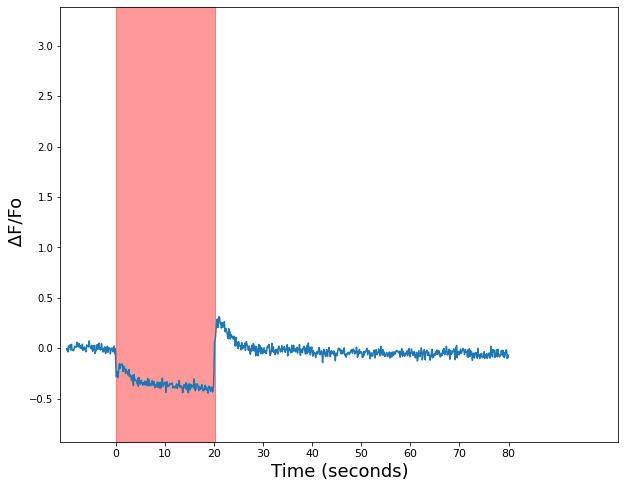

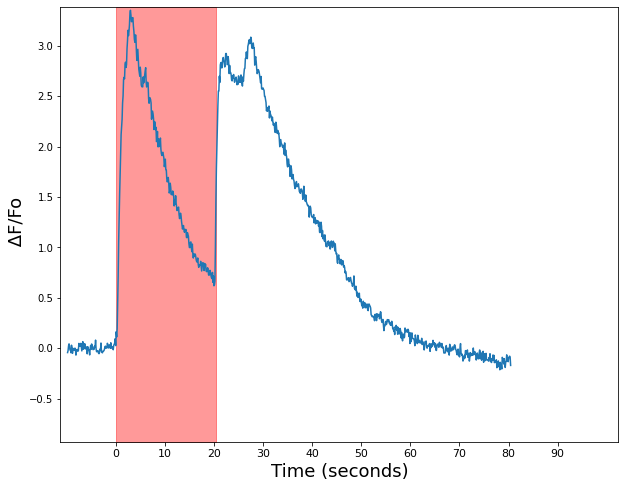

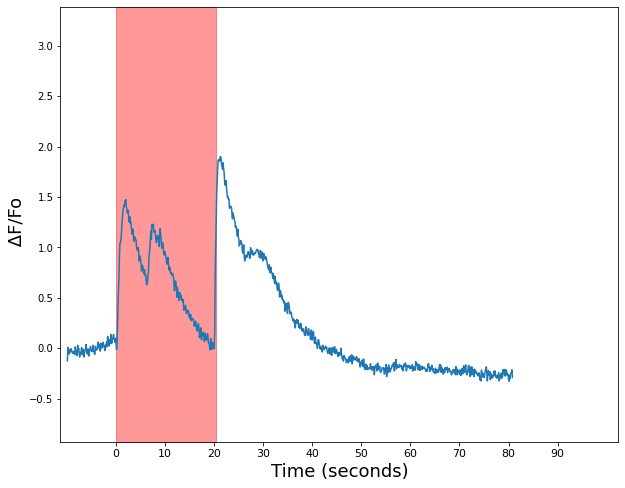

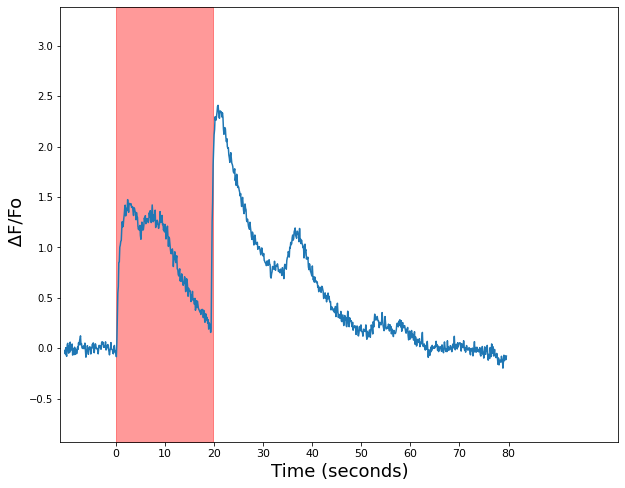

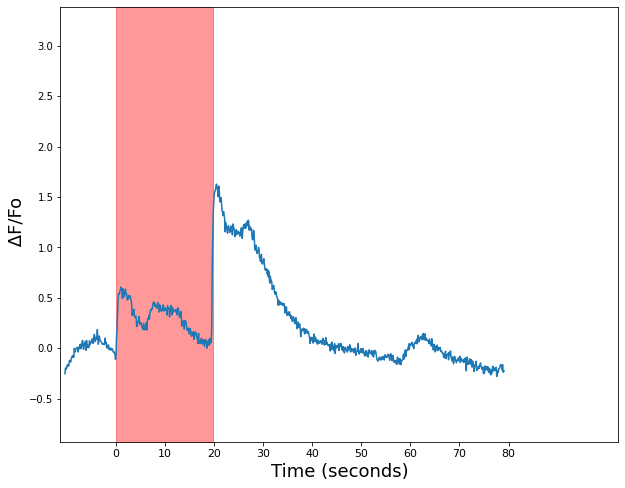

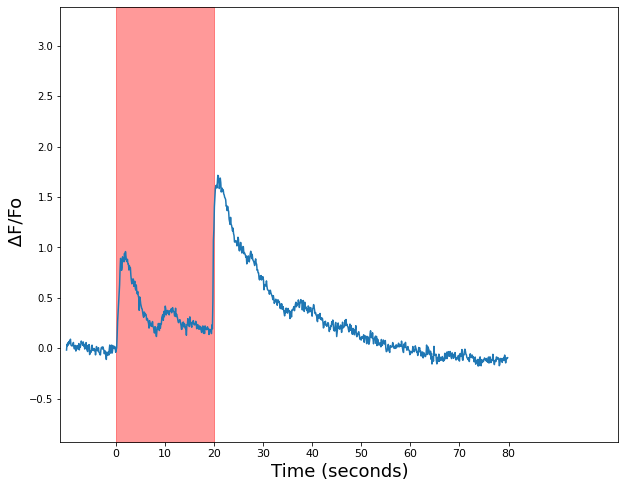

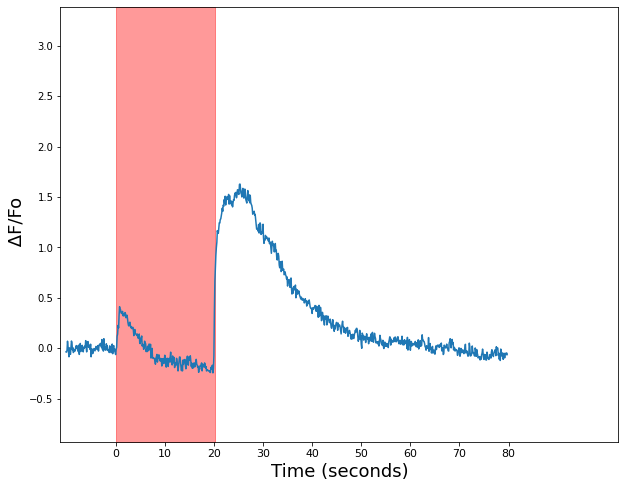

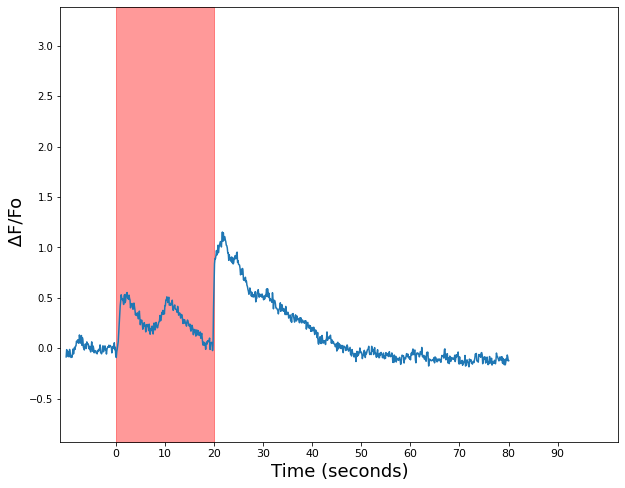

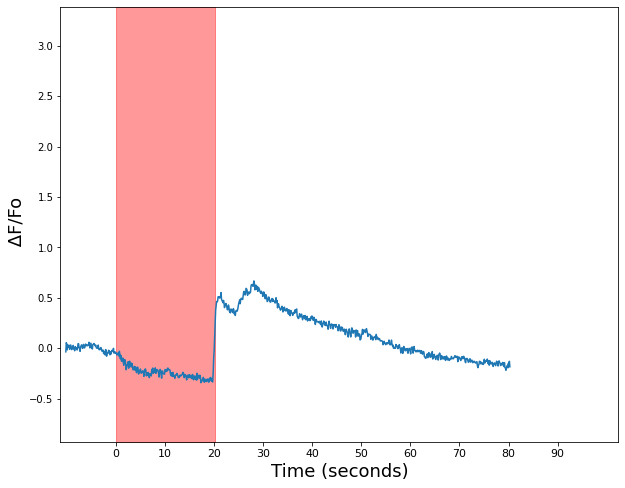

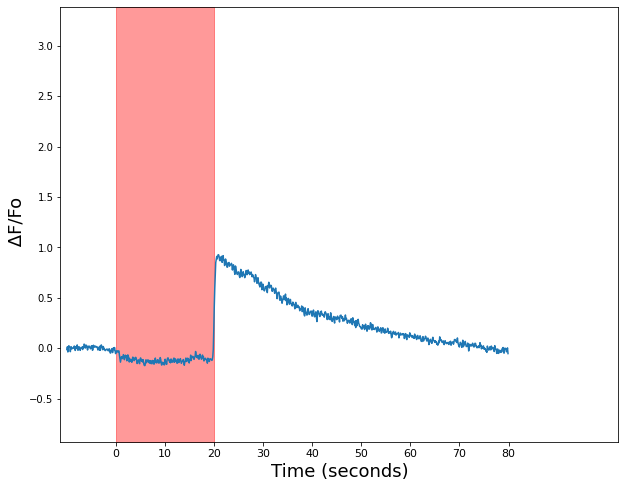

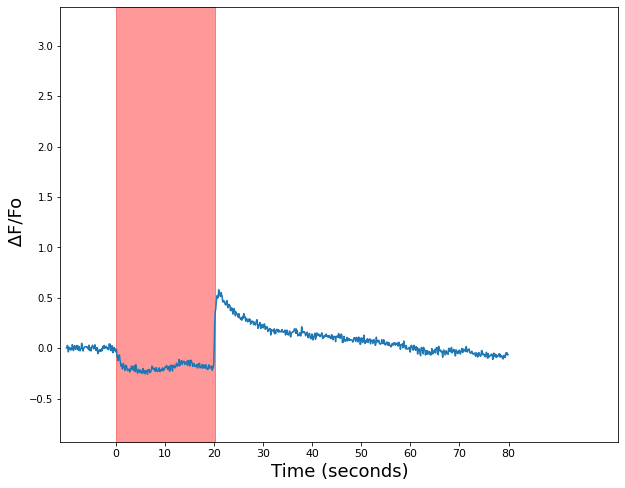

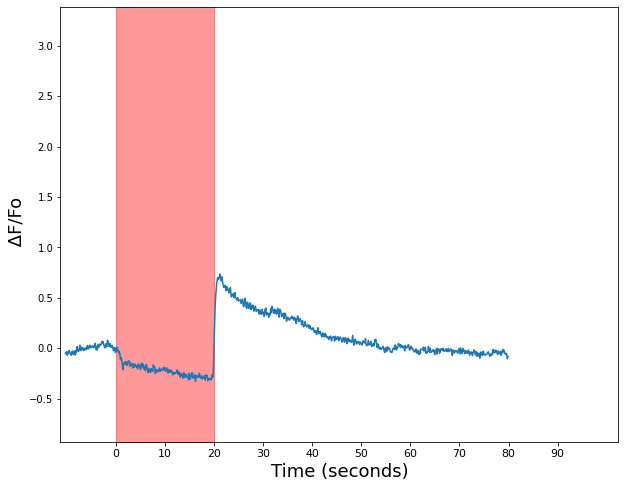

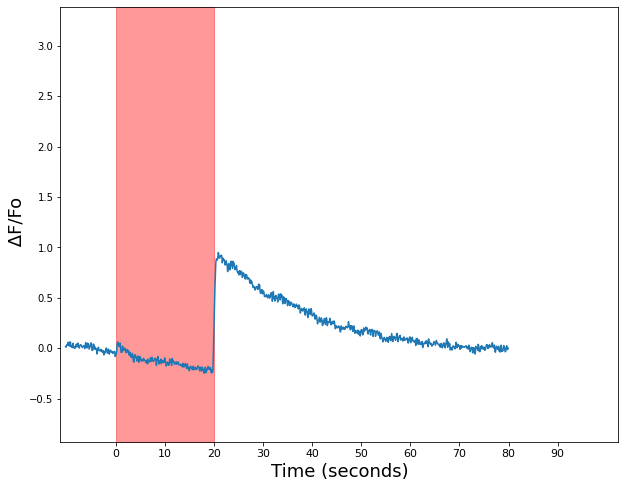

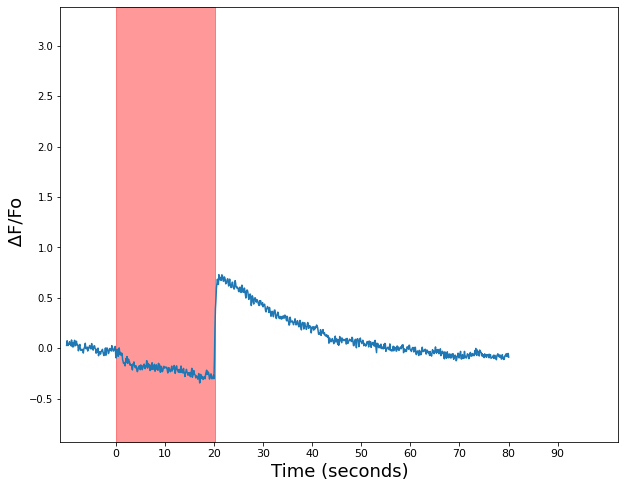

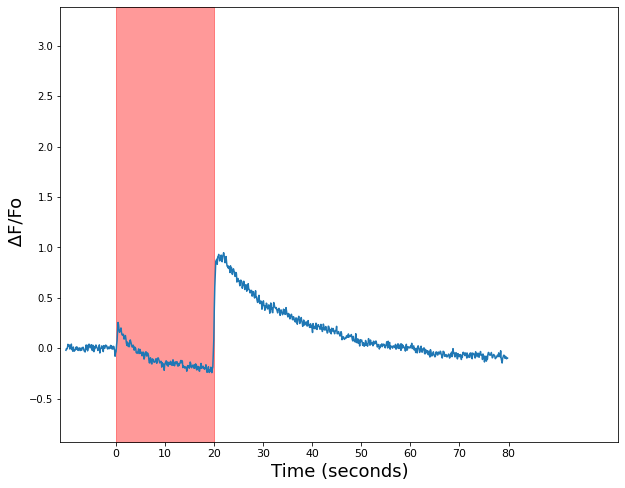

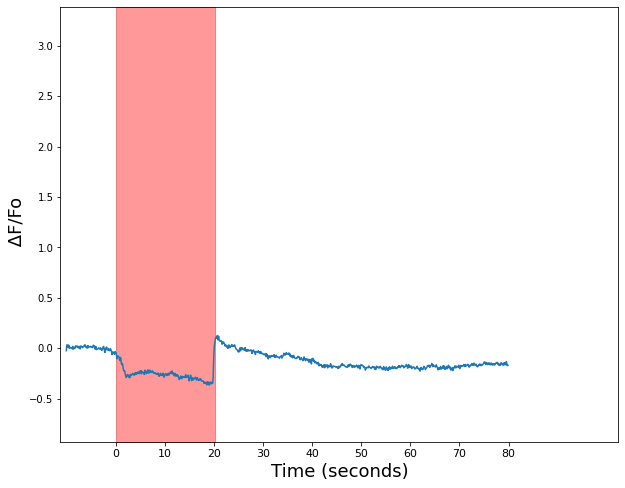

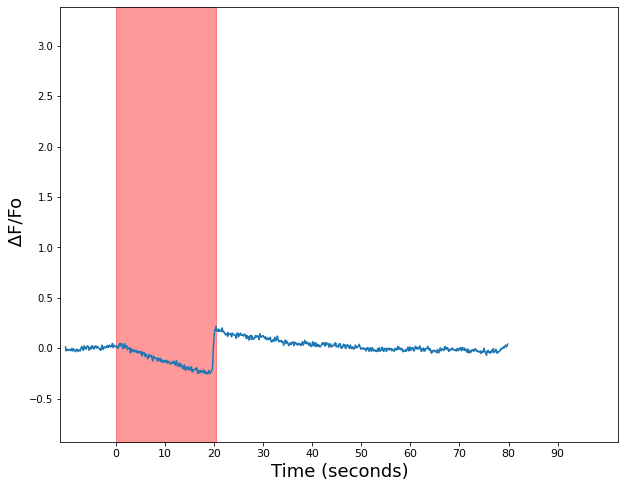

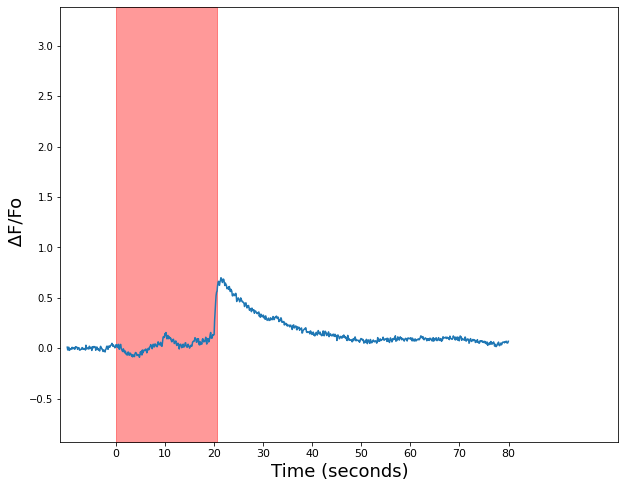

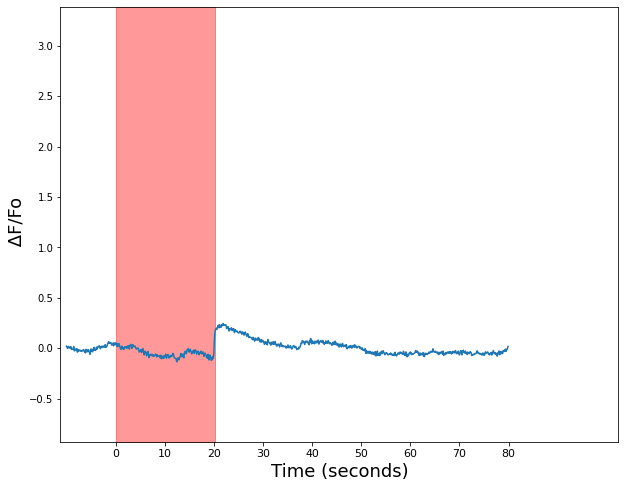

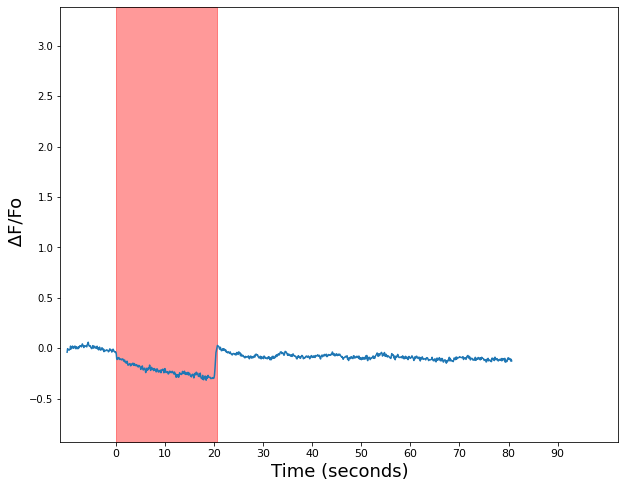

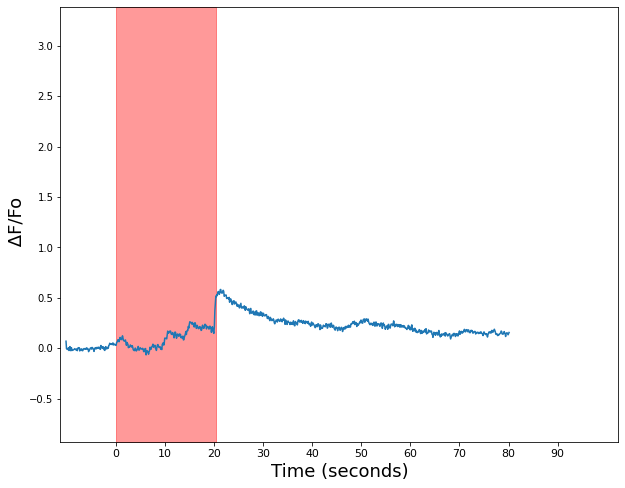

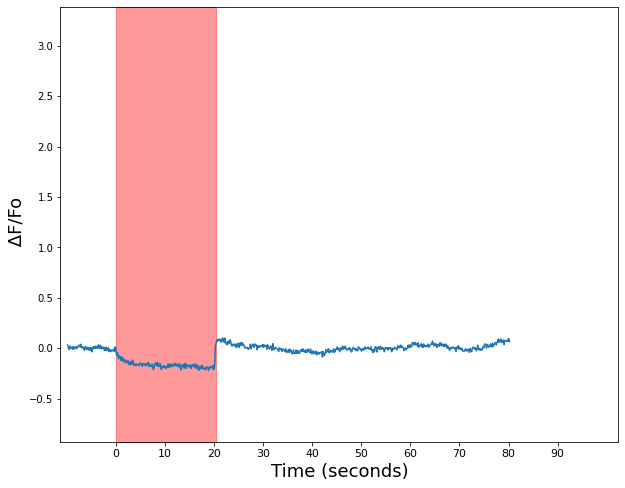

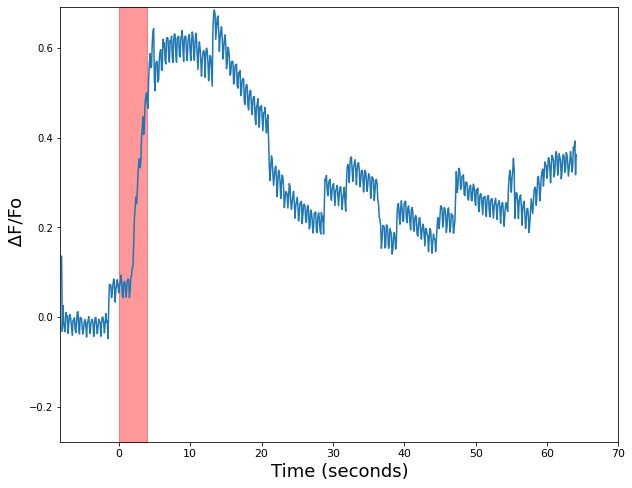

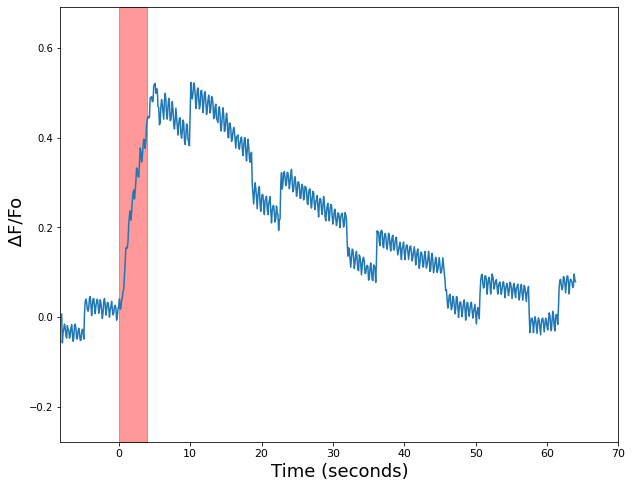

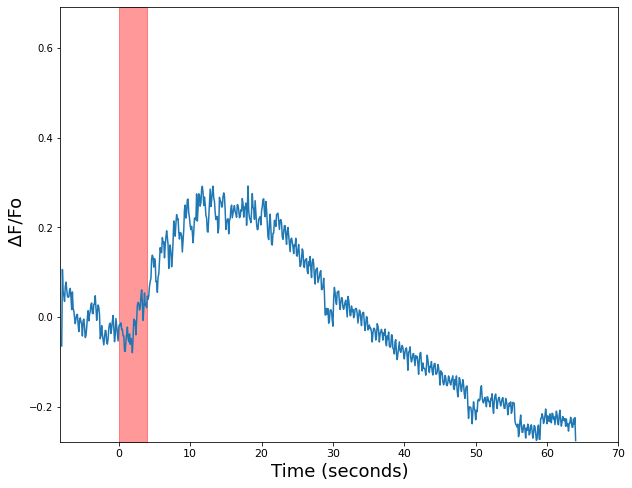

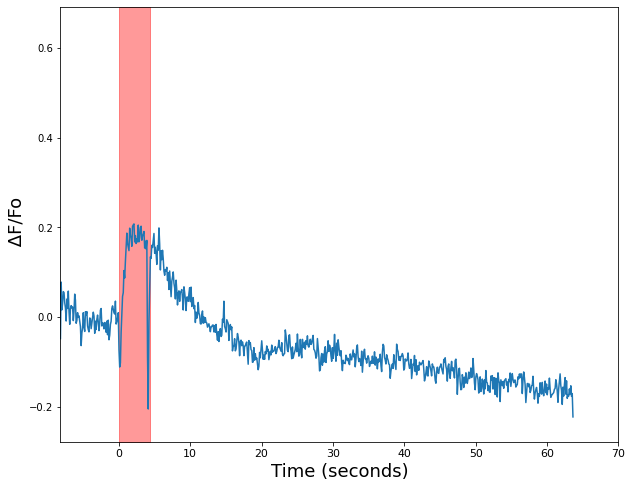

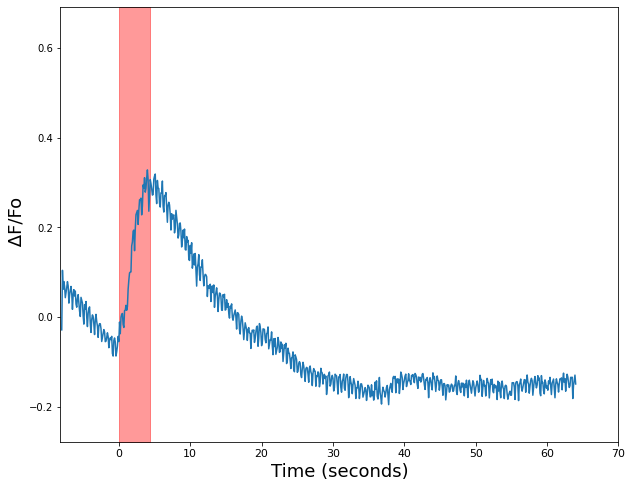

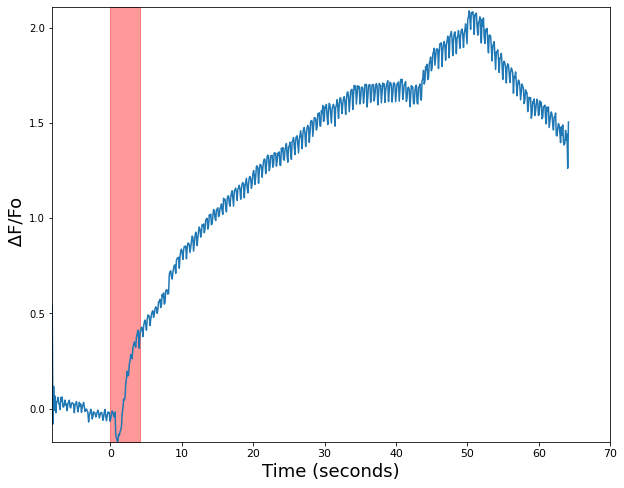

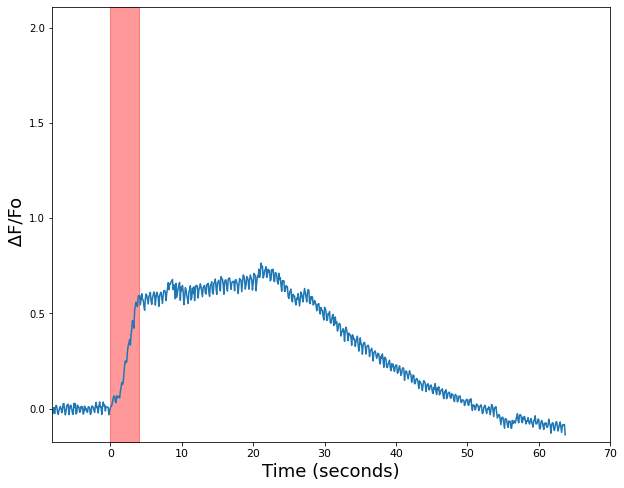

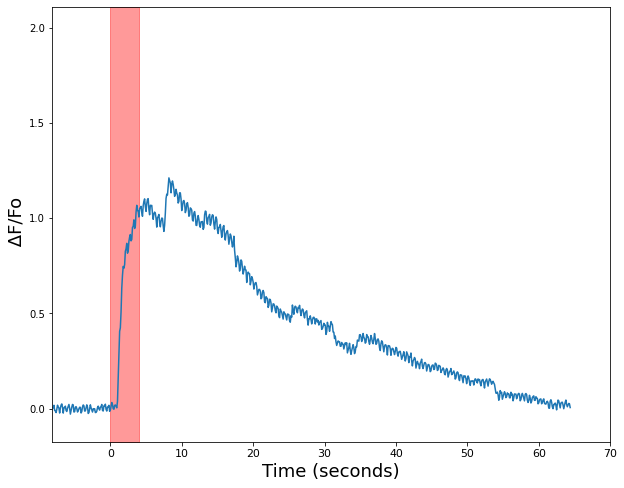

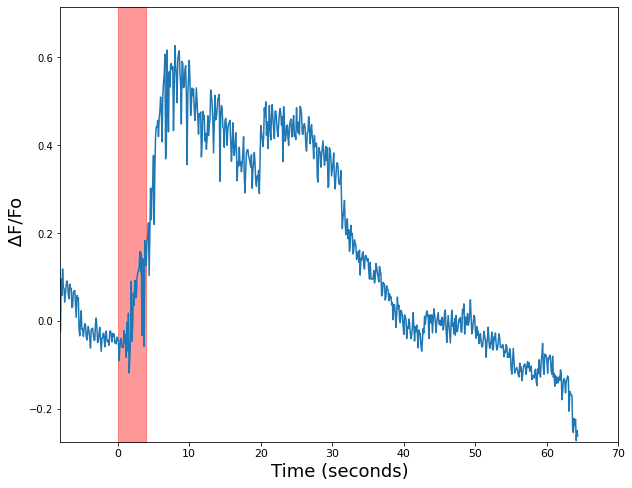

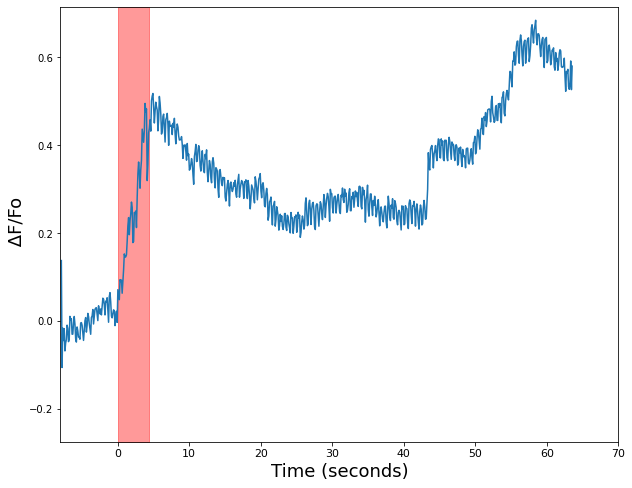

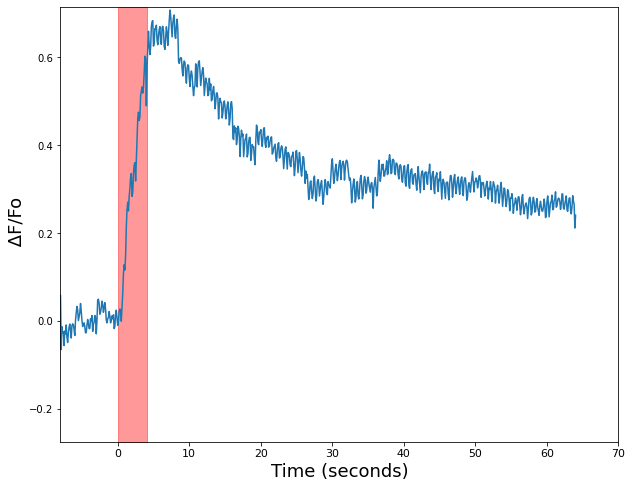

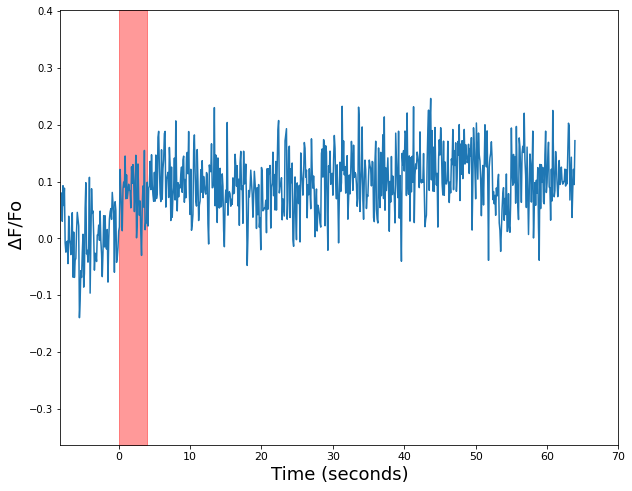

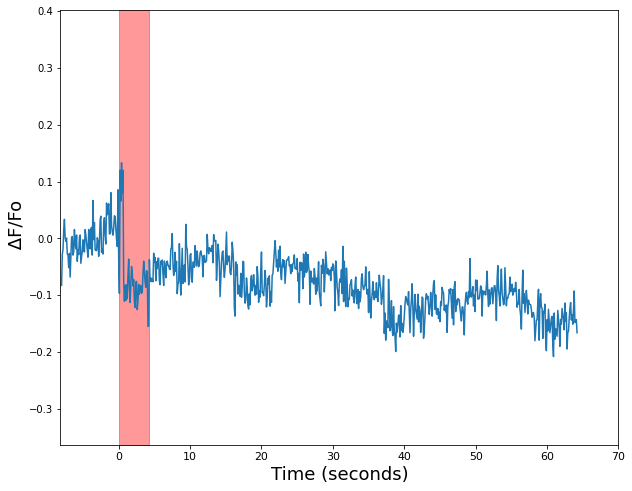

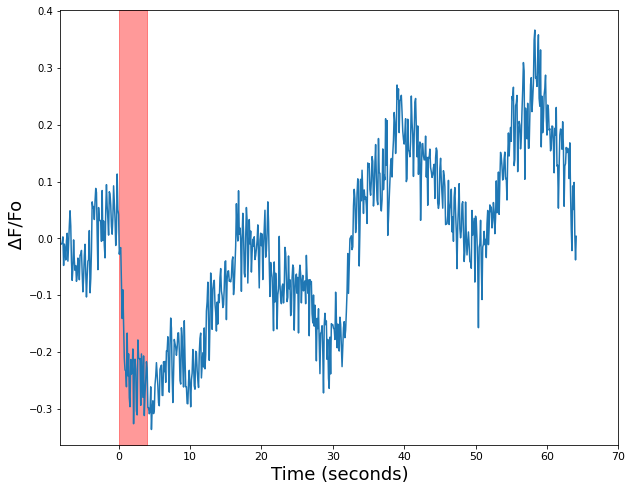

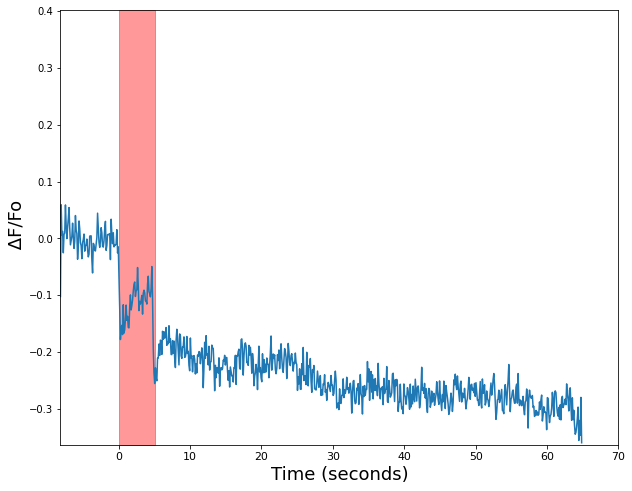

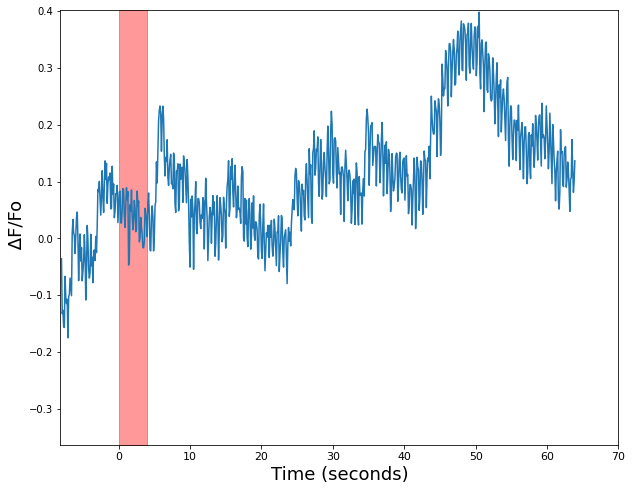

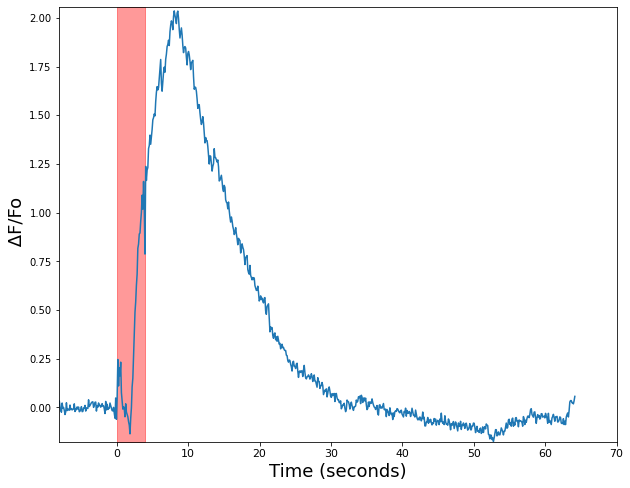

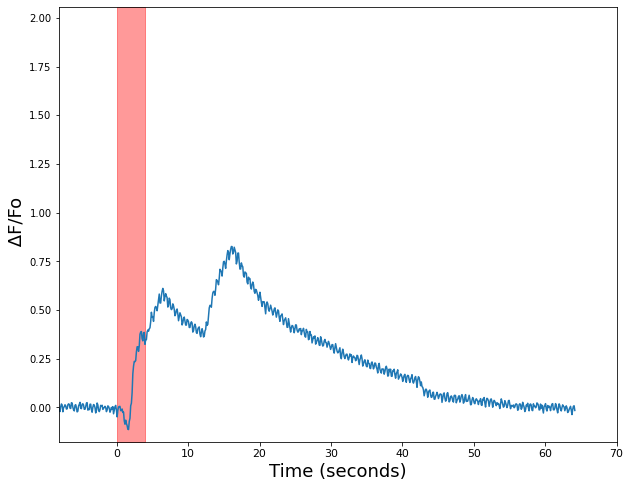

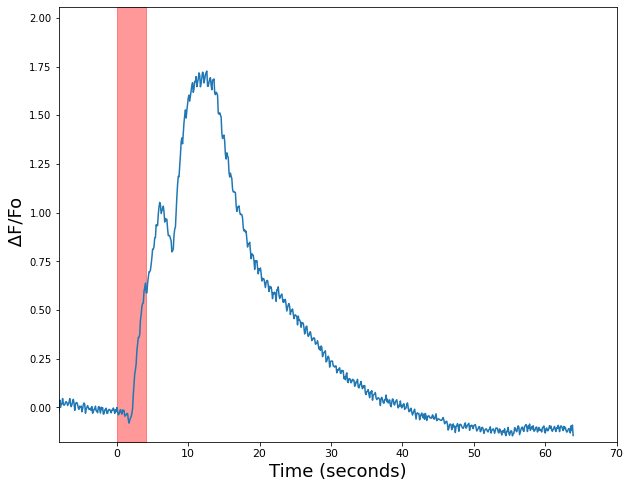

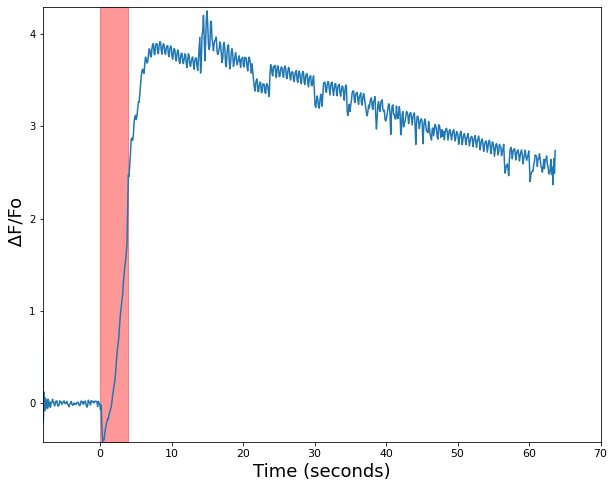

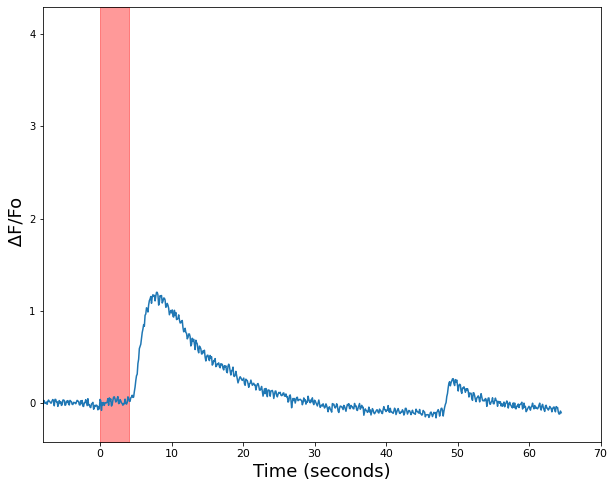

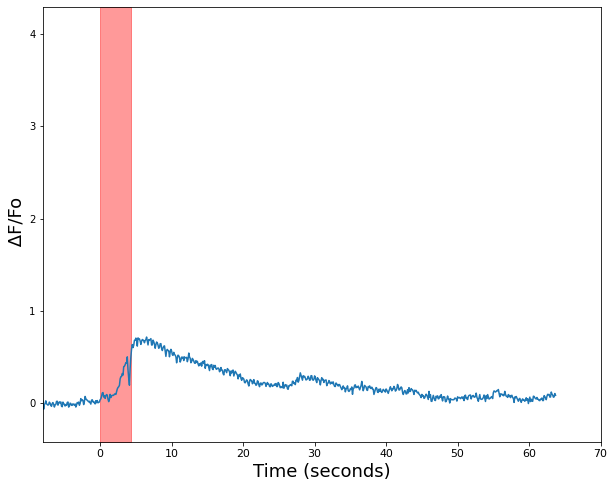

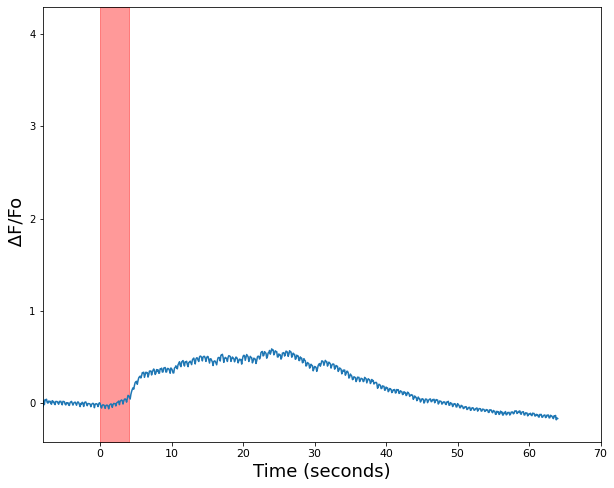

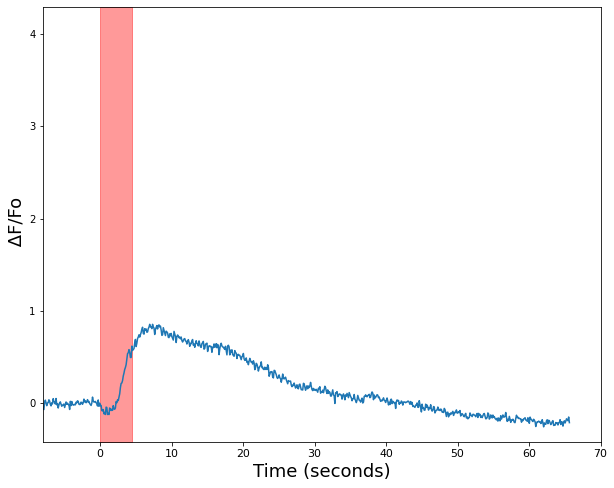

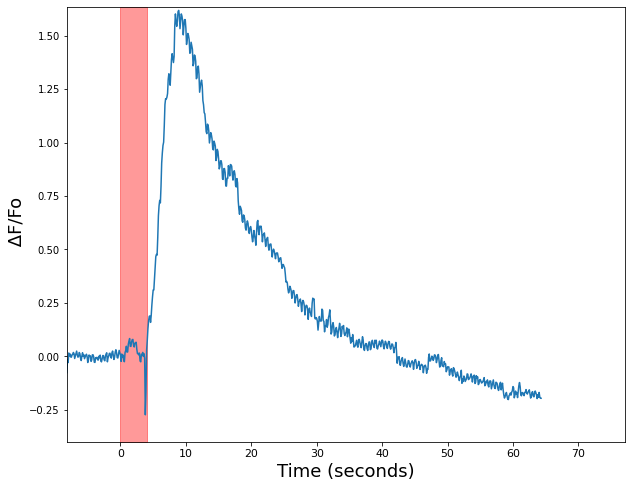

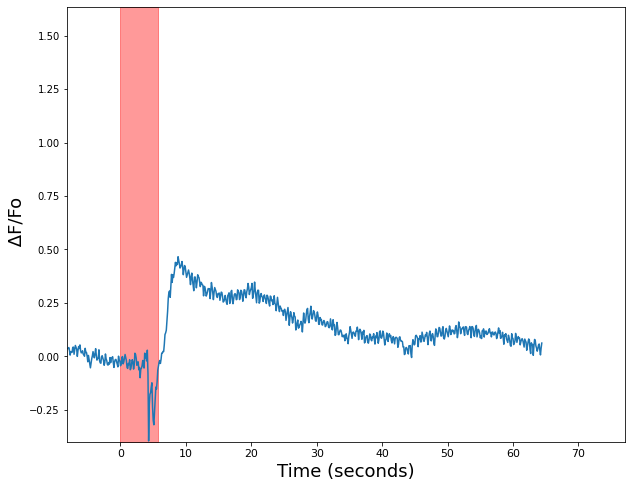

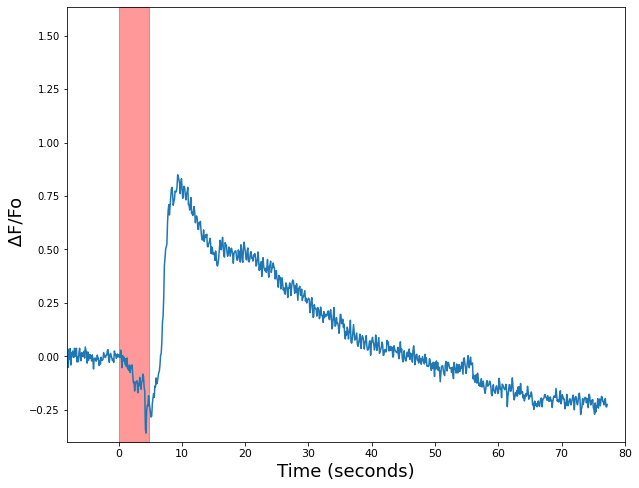

In [29]:
# Plot the traces, save them and store the relevant data in csv files
for i in range(len(sub_meta_df.index)):
    plot_panels(sub_meta_df.iloc[i])

In [28]:
# Saving the dataframe with the metadata for later reference
meta_df.to_csv('../results/trns_panels_14022023/meta_data.csv')

In [18]:
def nested_dict_pairs_iterator(dict_obj):
    ''' This function accepts a nested dictionary as argument
        and iterate over all values of nested dictionaries
    '''
    # Iterate over all key-value pairs of dict argument
    for key, value in dict_obj.items():
        # Check if value is of dict type
        if isinstance(value, dict):
            # If value is dict then iterate over all its values
            for pair in  nested_dict_pairs_iterator(value):
                yield (key, *pair)
        else:
            # If value is not dict type then yield the value
            yield (key, value)

In [ ]:
def smart_export(row, summary_savepath, data_save_path):
    
    df_summary = pd.DataFrame()
    df_plotdata = pd.DataFrame()

    for k in row.keys():
        if isinstance(row[k], dict):

            for pair in (nested_dict_pairs_iterator(row[k])):
                data = (pair[-1])
                new_key = '__'.join(pair[:-1])
                new_key = f'{k}__{new_key}'
                print(new_key, data)

        # if the cell is an array
        elif isinstance(row[k], np.ndarray):
            try:
                df_plotdata.at[:row[k].shape[0]-1,k] = row[k]
            except ValueError as e1:
                print('Value error: array',k, row[k].shape)
                print(e1)

        # if the cell is a list
        elif isinstance(row[k], list):
            for ln in range(len(row[k])):
                df_summary.at[0,f'{k}_l{ln}'] = row[k][ln]
        # if the cell is a string
        elif isinstance(row[k], str):
            df_summary.at[0,k] = row[k]
        # else, hopefully boolean, int and float datatypes only
        else:
            df_summary.at[0,k] = row[k]

    display(df_summary)
    display(df_plotdata)